# Fake articles classification project

## Dataset description:
The dataset contains two types of articles fake and real News. This dataset was collected from realworld sources; the truthful articles were obtained by crawling articles from Reuters.com (News website). As for the fake news articles, they were collected from different sources. The fake news articles were collected from unreliable websites that were flagged by Politifact (a fact-checking organization in the USA) and Wikipedia. The dataset contains different types of articles on different topics, however, the majority of articles focus on political and World news topics.

The dataset consists of two CSV files. The first file named “True.csv” contains more than 12,600 articles from reuter.com. The second file named “Fake.csv” contains more than 12,600 articles from different fake news outlet resources. Each article contains the following information: article title, text, type and the date the article was published on. To match the fake news data collected for kaggle.com, we focused mostly on collecting articles from 2016 to 2017. The data collected were cleaned and processed, however, the punctuations and mistakes that existed in the fake news were kept in the text. (description taken from kaggle.com)

### Article subject categories overview:
- ``politicsNews:`` This category likely includes news articles related to political events, developments, and discussions primarily within the United States. It may cover topics such as elections, government policies, political scandals, and legislative decisions.
- ``worldnews:`` This category encompasses news articles covering global events, issues, and developments beyond the borders of the United States. It may include international politics, conflicts, diplomatic relations, humanitarian crises, and major international events.
- ``News:`` The generic category "News" likely includes a wide range of news articles covering various topics, including but not limited to politics, world events, business, technology, health, science, entertainment, and lifestyle.
- ``politics:`` Similar to "politicsNews," this category may focus specifically on news related to domestic politics, government activities, and political discourse within the United States. It could cover election campaigns, policy debates, political controversies, and political party activities.
- ``Government News:`` This category likely comprises news articles specifically focused on government-related topics, such as legislative initiatives, executive branch actions, judicial decisions, government programs, and regulatory policies.
- ``left-news:`` This category may refer to news articles or sources with a left-leaning or liberal ideological perspective.
- ``US_News:`` This category may encompass news articles covering a wide range of topics relevant to the United States, including politics, economy, society, culture, and regional news from various states.
- ``Middle-east:`` This category likely includes news articles specifically focused on events, developments, and issues concerning countries in the Middle East region. It may cover topics such as conflicts, geopolitics, security issues, socio-economic developments, and cultural trends in the Middle East.

## Historical background:
Here are some notable events in the USA during the timeframe mentioned in the dataset:

- ``U.S. Presidential Elections (2016):`` The 2016 presidential election cycle, including primary contests, debates, and the general election between Donald Trump and Hillary Clinton, would have been extensively covered. News websites likely provided in-depth analysis, polling data, and coverage of key campaign events.
- ``Trump Administration Policies:`` Following the inauguration of President Donald Trump in January 2017, news websites covered various policy initiatives, executive orders, and legislative efforts undertaken by the new administration. This included topics such as immigration reform, tax reform, healthcare legislation, and deregulation efforts.
- ``International Relations:``
    - News websites reported on U.S. foreign policy, diplomatic engagements, and international developments during this period. Key events included tensions with North Korea, the Iran nuclear deal, trade negotiations, and shifts in alliances.
    - Investigations into Russian interference in the 2016 U.S. presidential election, including allegations of hacking, social media manipulation, and potential collusion with the Trump campaign, were ongoing. News websites provided updates on developments in these investigations, indictments, and congressional hearings.
- ``Mass Shootings and Gun Control:`` Tragic incidents of mass shootings occurred during this timeframe, sparking debates about gun control laws and public safety. News websites likely covered these events, along with discussions about gun rights and legislative proposals.
- ``Natural Disasters:`` News websites provided coverage of natural disasters affecting the USA, including hurricanes, wildfires, floods, and severe weather events. Reporting focused on emergency response efforts, damage assessments, and community resilience.
- ``Economic Indicators:`` News websites reported on economic data releases, trends, and forecasts during this period. Coverage included topics such as job growth, GDP growth, inflation, interest rates, and stock market performance.
- ``Healthcare Policy:`` Debates over healthcare policy, including the Affordable Care Act (Obamacare) and efforts to repeal or replace it, were prominent during this timeframe. News websites covered legislative battles, court challenges, and the impact of healthcare reforms on consumers and businesses.
- ``Social and Cultural Movements:`` News websites likely covered social and cultural movements such as the #MeToo movement, protests against racial injustice, and debates over immigration policy. These topics reflected broader discussions about social equity, diversity, and inclusion.

## Motivation:
- The trained models may facilitate in fighting misinformation and propaganda, protecting democracy, enhancing media literacy and safety.

## Main Objectives:
- Perform data cleaning and preprocessing.
- Perform EDA.
- Find the most predictive features from data and build a baseline model.
- Make 2+ ML models with engineered features.
- Make an end-to-end trainable deep-learning model
- Compare and analyze performances of all models on the test set.
- Analyze the misclassified items, understand and present why are they harder for the model to guess.

## Biases:
- Articles were labeled manually which may have introduced some level of subjectivity.
- The articles in the dataset were published during a limited timeframe with a certain historical background. Thus, the model may not perform well on more recent data.

In [6]:
# !pip install optuna
# !pip install textstat
# !pip install catboost
# !pip install --upgrade pytorch_lightning
# !pip install torch torchvision torchaudio
# !pip install --upgrade transformers
# !pip install transformers
# !pip install torchmetrics
# !pip install spacy
# !pip install shap lime

In [26]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import sys
import os
py_file_location = "/content/drive/MyDrive/Turing College/Module_4-Deep_Learning/Project_M4_S4_FakeNewsClassifier"
sys.path.append(os.path.abspath(py_file_location))
!cp /helper_functions.py .

cp: cannot stat '/helper_functions.py': No such file or directory


In [1]:
import helper_functions as hf
import imports

[nltk_data] Downloading package punkt to /Users/stacy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/stacy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/stacy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
fake_df = pd.read_csv("archive/Fake.csv")
true_df = pd.read_csv("archive/True.csv")

# 1. Data inspection, cleaning, and preprocessing

## 1.1. Initial dataset inspection

In [ ]:
true_df.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake_df.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
hf.inspect_dataframe(true_df)

Number of rows: 21417
Number of columns: 4

Column names and data types:
title              object
text               object
subject            object
date       datetime64[ns]
dtype: object

Missing values for each column:
title: 0 missing values (0.00%)
text: 0 missing values (0.00%)
subject: 0 missing values (0.00%)
date: 0 missing values (0.00%)

Categorical columns:

Column: title
Count of unique values: 20826
Count of duplicate values: 591 (2.76%)

Column: text
Count of unique values: 21192
Count of duplicate values: 225 (1.05%)

Column: subject
Count of unique values: 2
Mode: politicsNews
Unique values (up to the first 10): ['politicsNews', 'worldnews']

Datetime columns:

Column: date
  Minimum date: 2016-01-13 00:00:00
  Maximum date: 2017-12-31 00:00:00
  Mode: 2017-12-20 00:00:00


In [ ]:
hf.inspect_dataframe(fake_df)

Number of rows: 23481
Number of columns: 4

Column names and data types:
title              object
text               object
subject            object
date       datetime64[ns]
dtype: object

Missing values for each column:
title: 0 missing values (0.00%)
text: 0 missing values (0.00%)
subject: 0 missing values (0.00%)
date: 10 missing values (0.04%)

Categorical columns:

Column: title
Count of unique values: 17903
Count of duplicate values: 5578 (23.76%)

Column: text
Count of unique values: 17455
Count of duplicate values: 6026 (25.66%)

Column: subject
Count of unique values: 6
Mode: News
Unique values (up to the first 10): ['News', 'politics', 'Government News', 'left-news', 'US_News', 'Middle-east']

Datetime columns:

Column: date
  Minimum date: 2015-03-31 00:00:00
  Maximum date: 2018-02-19 00:00:00
  Mode: 2016-02-16 00:00:00


We will combine the dataframes into one with labels 1 for fake articles and 0 for true articles.

In [ ]:
fake_df['label'] = 1
true_df['label'] = 0
df = pd.concat([true_df, fake_df], ignore_index=True)

df['date'] = pd.to_datetime(df['date'],
                            errors='coerce',
                            format='mixed',
                            )

subject_mapping = {
    'left-news': 'left_news',
    'Government News': 'government_news',
    'Middle-east': 'middle_east',
    'worldnews': 'world_news',
    'politicsNews': 'politics_news',
    'politics': 'politics'
}
df['subject'] = df['subject'].map(subject_mapping)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    44898 non-null  object        
 1   text     44898 non-null  object        
 2   subject  35065 non-null  object        
 3   date     44888 non-null  datetime64[ns]
 4   label    44898 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.7+ MB


## 1.2. Handling duplicates

There are some duplicates in the dataset.
- 0.47% of rows are completely duplicated (including text, title, subject, and date). We've decided to drop them.
- 12.9% (including completely duplicated rows) of rows contain duplicated title + text values. The majority of them have subject 'left_news'/'government_news' subject categories and were published in December 2017. We've decided to drop them.
- 1.02% of 'text' column values are duplicates, though with different titles. We've decided to drop them.
- Overall, we've removed 13.9% of rows.

In [ ]:
hf.print_duplicate_statistics(df)

Total number of rows:  44898
--------------------
Number of completely duplicate rows in the dataset: 209
Percentage of completely duplicate rows in the dataset: 0.47%
--------------------
Number of duplicate values for 'title' column: 6169
Percentage of duplicate values for 'title' column: 13.74%
--------------------
Number of duplicate values for 'text' column: 6252
Percentage of duplicate values for 'text' column: 13.92%
--------------------
Number of duplicate values for combined 'title' and 'text' columns: 5793
Percentage of duplicate values for combined 'title' and 'text' columns: 12.90%
--------------------
Number of duplicate values for 'title' column not in combined duplicates: 376
Percentage of duplicate values for 'title' column not in combined duplicates: 0.84%
--------------------
Number of duplicate values for 'text' column not in combined duplicates: 459
Percentage of duplicate values for 'text' column not in combined duplicates: 1.02%
-----------------------------------

In [ ]:
df_upd = df.copy()
df_upd.drop_duplicates(inplace=True)
df_upd.reset_index(drop=True, inplace=True)
df_upd.drop_duplicates(subset=['title', 'text'], inplace=True)
df_upd.reset_index(drop=True, inplace=True)
df_upd.drop_duplicates(subset='text', inplace=True)
df_upd.reset_index(drop=True, inplace=True)

In [ ]:
df_upd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38646 entries, 0 to 38645
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    38646 non-null  object        
 1   text     38646 non-null  object        
 2   subject  28813 non-null  object        
 3   date     38640 non-null  datetime64[ns]
 4   label    38646 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.5+ MB


## 1.3. Handling missing values

In [ ]:
display(df_upd.isnull().sum() / len(df_upd))

missing_by_label = df_upd.groupby('label').apply(lambda x: x.isnull().sum(),
                                                 include_groups=False)
print("Missing Values by Label:")
print(missing_by_label)

title      0.000000
text       0.000000
subject    0.254438
date       0.000155
label      0.000000
dtype: float64

Missing Values by Label:
       title  text  subject  date
label                            
0          0     0        0     0
1          0     0     9833     6


<Axes: >

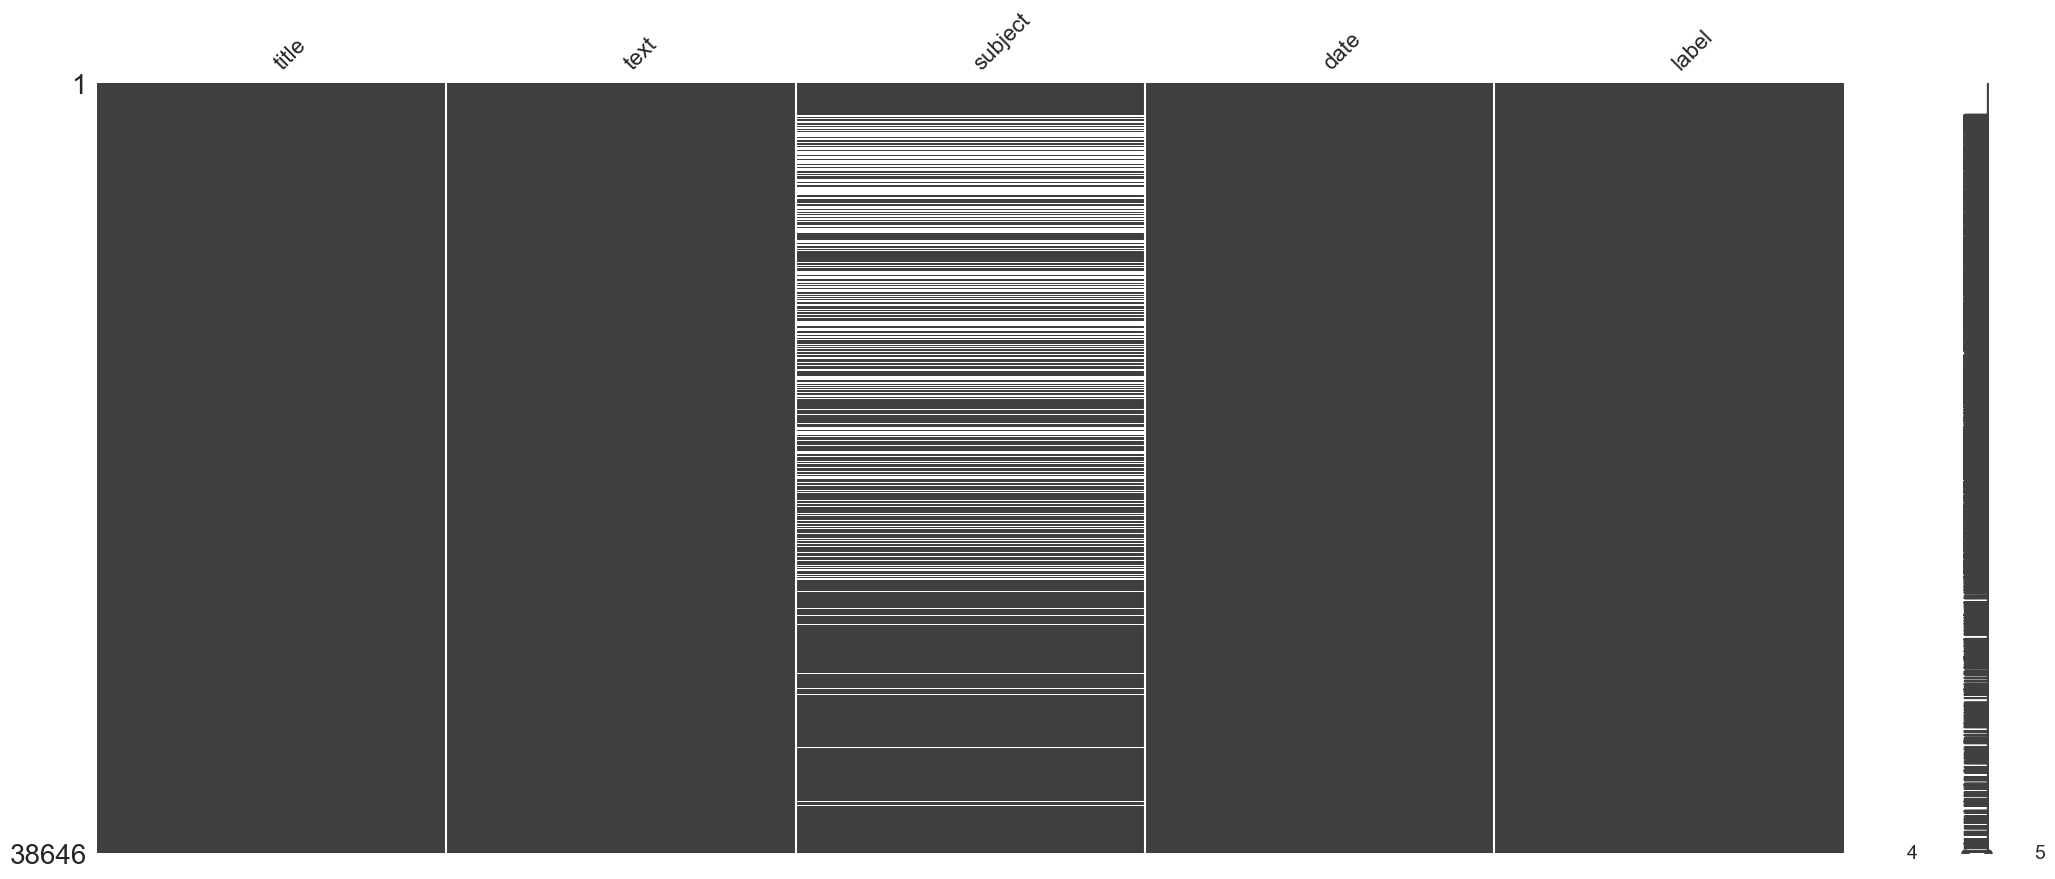

In [ ]:
msno.matrix(df_upd.sort_values(by=['date']))

- The majority of missing values are in the 'subject' column, especially throughout earlier dates.
- All of the missing values are among fake articles.
- We won't drop the NaNs for now.

## 1.4. Data cleaning

Let's analyze the beginnings of texts for true and fake articles:

In [ ]:
fake_texts = df_upd[df_upd['label'] == 1]['text']
true_texts = df_upd[df_upd['label'] == 0]['text']

fake_texts_first_5_words = [text.split()[:5] for text in fake_texts]

true_texts_first_5_words = [text.split()[:5] for text in true_texts]

print("Unique First 5 Words for Fake texts:")
for words in set(tuple(words) for words in fake_texts_first_5_words[:10]):
    print(" ".join(words))

print("\nUnique First 5 Words for True texts:")
for words in set(tuple(words) for words in true_texts_first_5_words[:10]):
    print(" ".join(words))

Unique First 5 Words for Fake texts:
In the wake of yet
Pope Francis used his annual
Donald Trump just couldn t
On Friday, it was revealed
Donald Trump spent a good
Many people have raised the
On Christmas day, Donald Trump
House Intelligence Committee Chairman Devin
The number of cases of
Just when you might have

Unique First 5 Words for True texts:
WASHINGTON (Reuters) - Alabama Secretary
WASHINGTON (Reuters) - The special
WASHINGTON (Reuters) - The head
The following statements were posted
WASHINGTON (Reuters) - Transgender people
SEATTLE/WASHINGTON (Reuters) - President Donald
WASHINGTON (Reuters) - Trump campaign
WEST PALM BEACH, Fla./WASHINGTON (Reuters)
WEST PALM BEACH, Fla (Reuters)


- We can observe that true articles tend to contain the name "Reuters" (the source of true articles in our dataset). We will get rid of these beginnings to avoid target leakage.
- Additionally, we will perform basic data cleaning to get rid of uppercase letters, white spaces, non-ASCII characters, links, and emojis.

In [ ]:
df_upd["clean_text"] = df_upd["text"].apply(hf.clean_text)

In [ ]:
df_upd["clean_title"] = df_upd["title"].apply(hf.clean_text)

In [ ]:
df_upd[['clean_text', 'clean_title']].isna().sum()

clean_text     55
clean_title     5
dtype: int64

It looks like some of the articles are not valid after cleaning. We will drop them.

In [ ]:
df_upd.dropna(subset=['clean_text', 'clean_title', 'date'], inplace=True)

We will create an additional column with title and text joined together:

In [ ]:
df_upd['title_text'] = df_upd['clean_title'] + '. ' + df_upd['clean_text']

In [ ]:
df_upd[["text", "clean_text"]].head(10)

,text,clean_text
0,WASHINGTON (Reuters) - The head of a conservat...,the head of a conservative republican faction ...
1,WASHINGTON (Reuters) - Transgender people will...,transgender people will be allowed for the fir...
2,WASHINGTON (Reuters) - The special counsel inv...,the special counsel investigation of links bet...
3,WASHINGTON (Reuters) - Trump campaign adviser ...,trump campaign adviser george papadopoulos tol...
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,president donald trump called on the u.s. post...
5,"WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",the white house said on friday it was set to k...
6,"WEST PALM BEACH, Fla (Reuters) - President Don...",president donald trump said on thursday he bel...
7,The following statements were posted to the ve...,the following statements were posted to the ve...
8,The following statements were posted to the ve...,the following statements were posted to the ve...
9,WASHINGTON (Reuters) - Alabama Secretary of St...,alabama secretary of state john merrill said h...


In [ ]:
df_upd.head(5)

,title,text,subject,date,label,clean_text,clean_title,title_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politics_news,2017-12-31,0,the head of a conservative republican faction ...,"as u.s. budget fight looms, republicans flip t...","as u.s. budget fight looms, republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politics_news,2017-12-29,0,transgender people will be allowed for the fir...,u.s. military to accept transgender recruits o...,u.s. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politics_news,2017-12-31,0,the special counsel investigation of links bet...,senior u.s. republican senator: 'let mr. muell...,senior u.s. republican senator: 'let mr. muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politics_news,2017-12-30,0,trump campaign adviser george papadopoulos tol...,fbi russia probe helped by australian diplomat...,fbi russia probe helped by australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politics_news,2017-12-29,0,president donald trump called on the u.s. post...,trump wants postal service to charge 'much mor...,trump wants postal service to charge 'much mor...


In [ ]:
df_upd.to_csv("df_cleaned.csv")

In [ ]:
df_upd = pd.read_csv("df_cleaned.csv")
del df_upd['Unnamed: 0']

## 1.5. Distributions and Correlations

### 1.5.1. Distribution of the target variable

#### Main insights and observations:
- There are a bit more true articles than fake articles in the dataset.

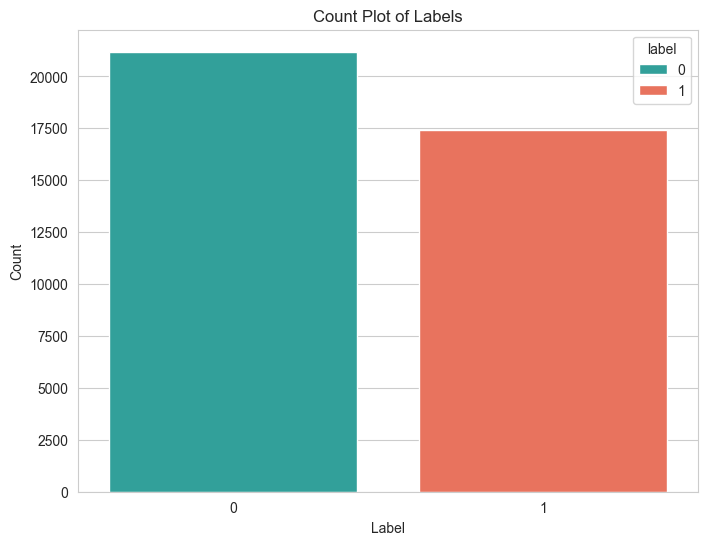

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df_upd, hue='label',
              hue_order=[0, 1], palette=["lightseagreen", "tomato"])
plt.title('Count Plot of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [ ]:
df_upd.label.value_counts()

label
0    21191
1    17399
Name: count, dtype: int64

### 1.5.2. Distribution of subjects

#### Main insights and observations:
- We can observe that fake articles have only subjects 'government_news', 'left_news', and 'politics', and real articles have subjects 'politics_news' and 'world_news'. Also, we should keep in mind that subject values are missing for 25% of entries (all of them are among fake articles).

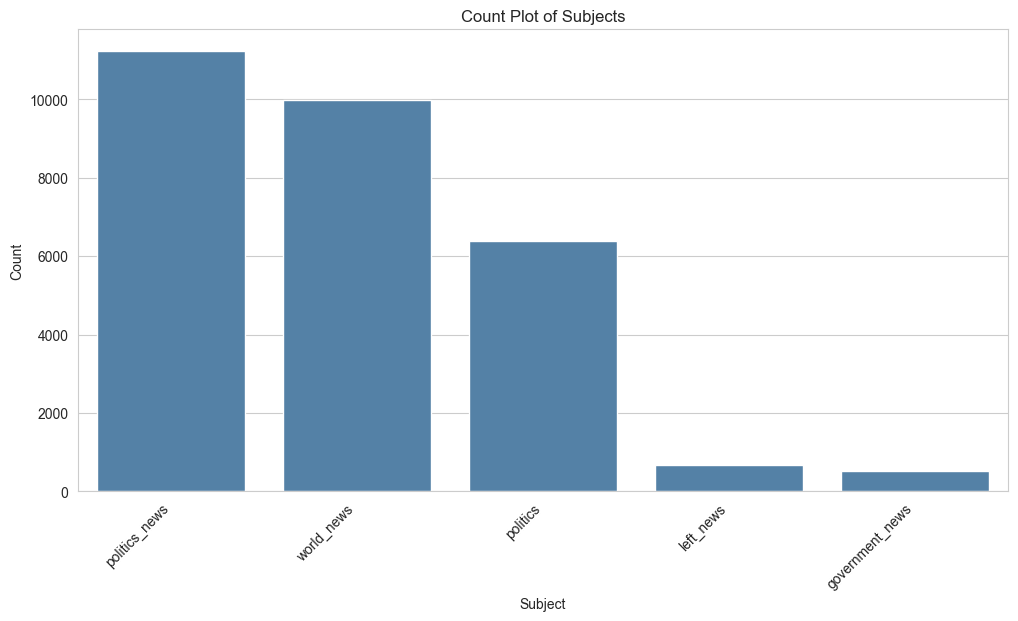

In [ ]:
subject_counts = df_upd['subject'].value_counts()
sorted_subjects = subject_counts.index
plt.figure(figsize=(12, 6))
sns.countplot(x='subject', data=df_upd, order=sorted_subjects, color="steelblue")
plt.title('Count Plot of Subjects')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
subject_label_counts = df_upd.groupby(['subject', 'label']).size().unstack(fill_value=0)
subject_label_counts

label,0,1
subject,,
government_news,0,514
left_news,0,681
politics,0,6371
politics_news,11213,0
world_news,9978,0


- We can observe that fake articles have only subjects 'government_news', 'left_news', and 'politics', and real articles have subjects 'politics_news' and 'world_news'. Also, we should keep in mind that subject values are missing for 25% of entries (all of them are among fake articles).

### 1.5.3. Distribution of the target variable over time

#### Main insights and observations:
- The most fake articles were published in 2016. The majority of true articles were published in the second half of 2017.
- In 2015 and in the first quarter of 2018 all articles are fake in this dataset. Thus, it may be benefitial to drop articles published in 2015 and 2018 for the modeling stage to avoid overfitting.

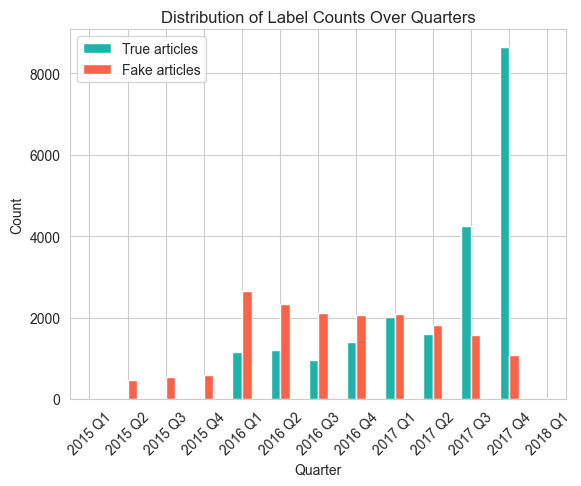

In [ ]:
df_date = df_upd.copy()
df_date['date'] = pd.to_datetime(df_date['date'])
df_date.set_index('date', inplace=True)

label_counts = df_date.groupby([pd.Grouper(freq='Q'), 'label']).size().unstack(fill_value=0)

ax = label_counts.plot(kind='bar', stacked=False, color=["lightseagreen", "tomato"])

quarters = label_counts.index.to_period('Q').unique()

ax.set_xticks(range(len(quarters)))
ax.set_xticklabels([q.strftime('%Y Q%q') for q in quarters], rotation=45)

plt.xlabel('Quarter')
plt.ylabel('Count')
plt.title('Distribution of Label Counts Over Quarters')

plt.legend(['True articles', 'Fake articles'])

plt.show()

In [ ]:
total_counts = label_counts.sum(axis=1)
true_share = label_counts[0] / total_counts
fake_share = label_counts[1] / total_counts

quarterly_info = pd.DataFrame({
    'True count': label_counts[0],
    'Fake count': label_counts[1],
    'True share': round(true_share, 2),
    'Fake share': round(fake_share, 2),
})

quarterly_info.reset_index(inplace=True)
quarterly_info.rename(columns={'date': 'Quarter'}, inplace=True)
print(quarterly_info)

      Quarter  True count  Fake count  True share  Fake share
0  2015-03-31           0           6        0.00        1.00
1  2015-06-30           0         471        0.00        1.00
2  2015-09-30           0         530        0.00        1.00
3  2015-12-31           0         590        0.00        1.00
4  2016-03-31        1161        2659        0.30        0.70
5  2016-06-30        1194        2346        0.34        0.66
6  2016-09-30         951        2122        0.31        0.69
7  2016-12-31        1391        2069        0.40        0.60
8  2017-03-31        2017        2084        0.49        0.51
9  2017-06-30        1587        1831        0.46        0.54
10 2017-09-30        4247        1565        0.73        0.27
11 2017-12-31        8643        1091        0.89        0.11
12 2018-03-31           0          35        0.00        1.00


- The most fake articles were published in 2016. The majority of true articles were published in the second half of 2017.
- In 2015 and in the first quarter of 2018 all articles are fake in this dataset. Thus, it may be benefitial to drop articles published in 2015 and 2018 for the modeling stage to avoid overfitting.

### 1.5.4. Distributions of word counts, unique word counts, and sentence counts

#### Main insights and observations:
- Fake articles tend to have more unique words and words overall.
- There are outliers in the sentence/word/unique-word counts, especially in fake articles.
- The majority of articles have length up to 1000 words and up to 500 unique words.

In [ ]:
df_feat = df_upd.copy()

In [ ]:
df_feat['num_sentences'], df_feat['num_words'], df_feat['unique_words'] = zip(*df_feat['title_text'].apply(hf.extract_features))

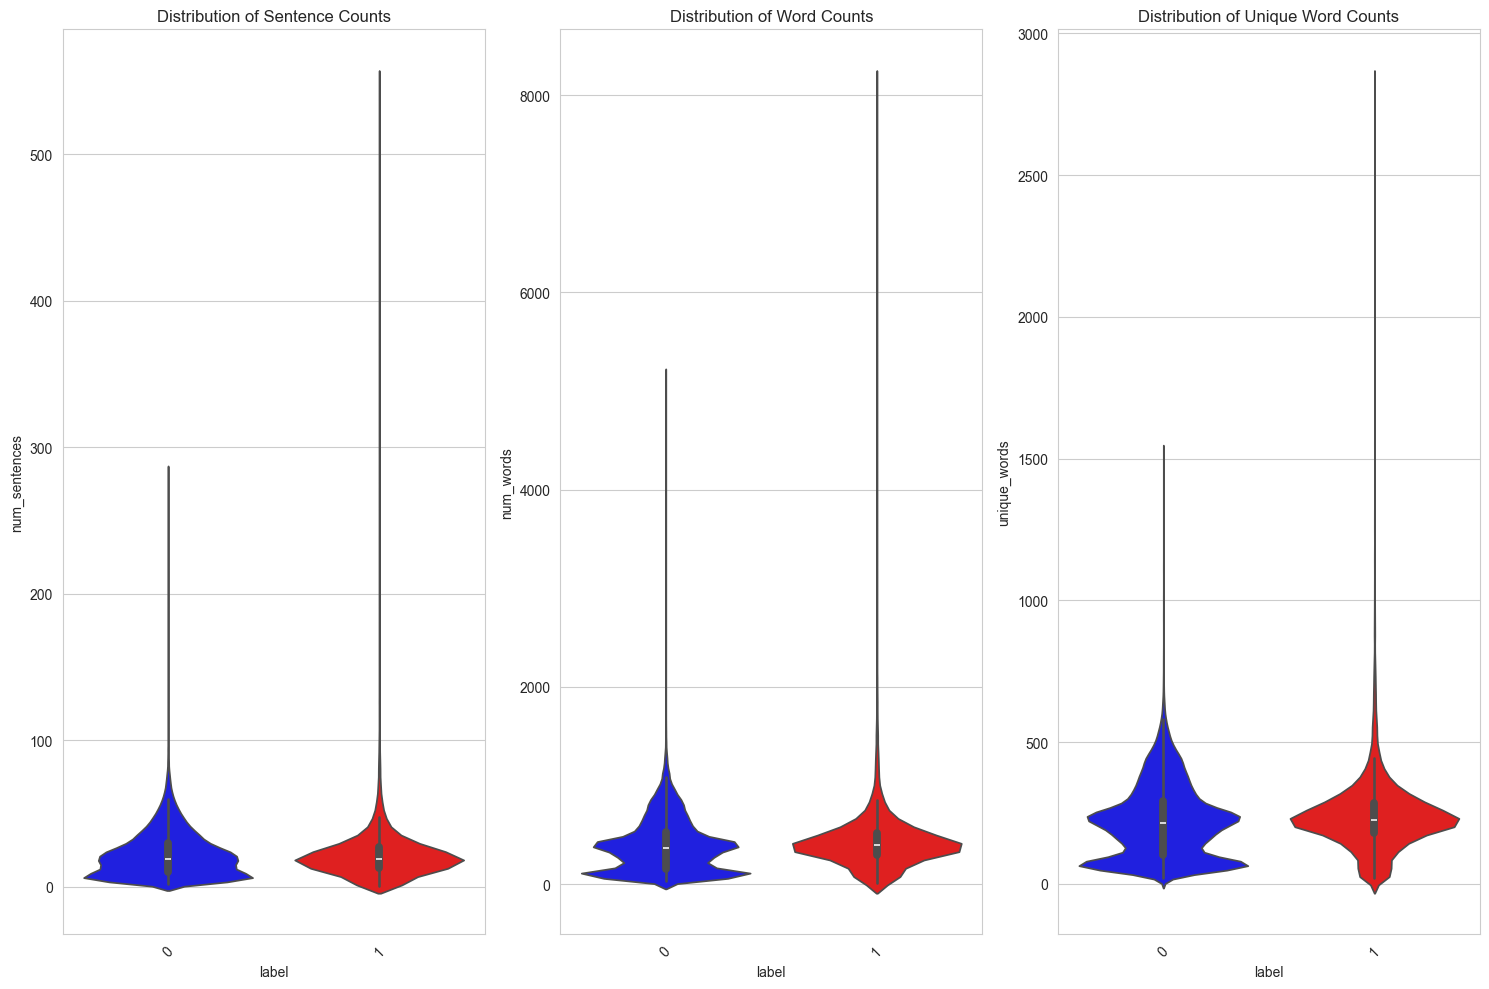

In [ ]:
y_list = ['num_sentences', 'num_words', 'unique_words']
titles = ['Sentence Counts', 'Word Counts', 'Unique Word Counts']
hf.plot_violin_subplots(x='label', y_list=y_list, df=df_feat,
                        titles=titles, figsize=(15, 10))

In [ ]:
stats_by_label = df_feat.groupby('label').agg({'num_sentences': ['mean', 'median', 'std'],
                                          'num_words': ['mean', 'median', 'std'],
                                          'unique_words': ['mean', 'median', 'std']})
stats_by_label.columns = ['mean_num_sentences', 'median_num_sentences', 'std_num_sentences',
                          'mean_num_words', 'median_num_words', 'std_num_words',
                          'mean_unique_words', 'median_unique_words', 'std_unique_words']
stats_by_label

,mean_num_sentences,median_num_sentences,std_num_sentences,mean_num_words,median_num_words,std_num_words,mean_unique_words,median_unique_words,std_unique_words
label,,,,,,,,,
0,22.364872,19.0,16.056826,391.445189,365.0,273.442941,219.484498,214.0,130.374151
1,22.210127,19.0,18.473427,440.699695,391.0,355.109838,242.455256,227.0,144.007907


- Fake articles tend to have more unique words and words overall.
- There are outliers in the sentence/word/unique-word counts, especially in fake articles.
- The majority of articles have length up to 1000 words and up to 500 unique words.

### 1.5.5. Distributions of token counts and unique token counts

#### Main insights and observations:
- Fake articles tend to have a bit higher token and unique token counts as compared to true articles.
- There are outliers in the token/unique-token counts, especially in fake articles.
- The majority of articles have length up to 1000 tokens and up to 500 unique tokens (unigram tokenization).

In [ ]:
df_feat['tokenized_title_text'] = df_feat['title_text'].apply(lambda x:
                                                              word_tokenize(x))
df_feat['token_count'] = df_feat['tokenized_title_text'].apply(lambda x: len(x))
df_feat['unique_token_count'] = df_feat['tokenized_title_text'].apply(lambda x: len(set(x)))

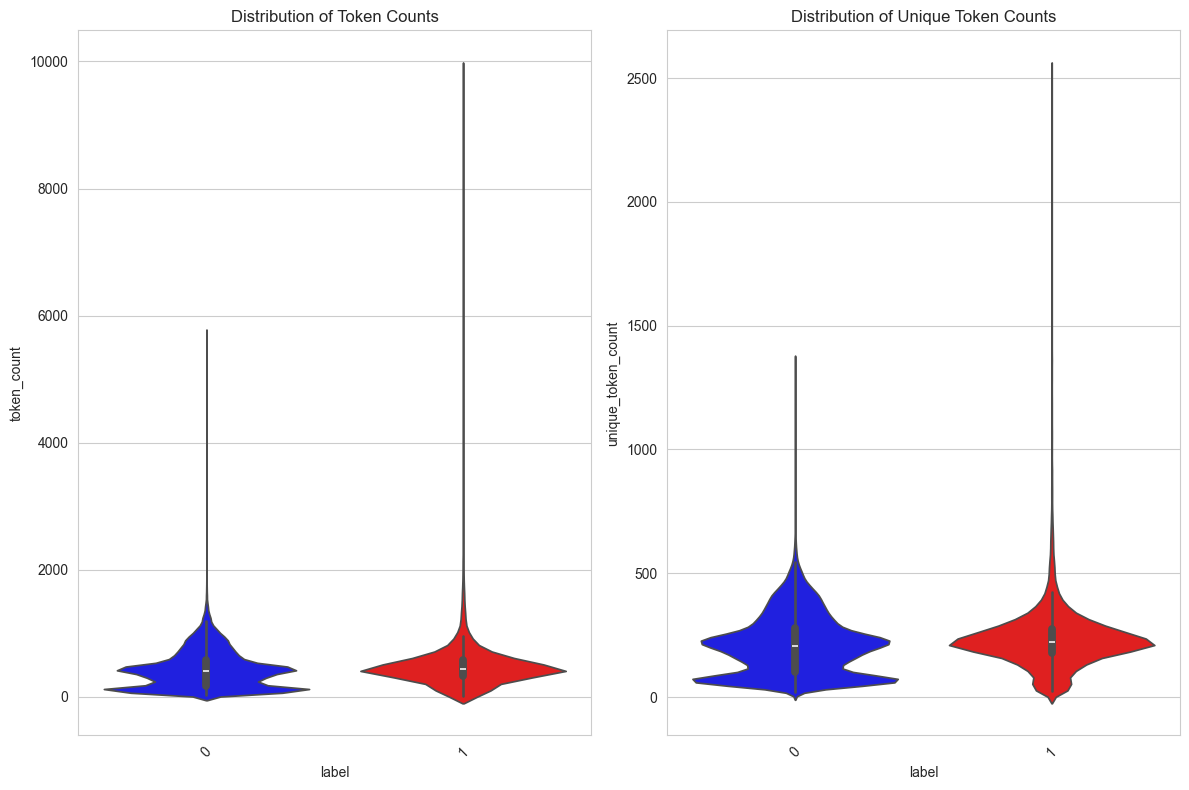

In [ ]:
y_list = ['token_count', 'unique_token_count']
titles = ['Token Counts', 'Unique Token Counts']
hf.plot_violin_subplots(x='label', y_list=y_list, df=df_feat,
                        titles=titles, figsize=(12, 8))

In [ ]:
token_stats_by_label = df_feat.groupby('label').agg({'token_count':
                                                         ['mean', 'median', 'std'],
                                                     'unique_token_count':
                                                         ['mean', 'median', 'std']})
token_stats_by_label.columns = ['mean_token_count', 'median_token_count',
                                'std_token_count', 'mean_unique_token_count', 'median_unique_token_count', 'std_unique_token_count']
token_stats_by_label

,mean_token_count,median_token_count,std_token_count,mean_unique_token_count,median_unique_token_count,std_unique_token_count
label,,,,,,
0,429.43594,400.0,300.892102,209.581992,205.0,120.880387
1,490.82430,433.0,401.842109,235.090465,222.0,131.532850


- Fake articles tend to have a bit higher token and unique token counts as compared to true articles.
- There are outliers in the token/unique-token counts, especially in fake articles.
- The majority of articles have length up to 1000 tokens and up to 500 unique tokens (unigram tokenization).

In [ ]:
display(df_feat['token_count'].describe())
print('95-percentile:')
display(df_feat['token_count'].quantile(0.95))

count    38590.000000
mean       457.113993
std        351.355668
min         12.000000
25%        251.000000
50%        418.000000
75%        578.000000
max       9870.000000
Name: token_count, dtype: float64

95-percentile:


980.0

Let's update the max token length:

In [ ]:
percentile_95 = int(df_feat['token_count'].quantile(0.95))
df_feat['tokenized_title_text'] = df_feat['tokenized_title_text']\
    .apply(lambda tokens:tokens[:percentile_95])

Let's also generate and look into the bi-gram tokenization:

In [ ]:
def tokenize_bigram(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in word_tokenize(text) if word.lower() not in stop_words]
    bigrams = ngrams(tokens, 2)
    bigram_strings = [' '.join(bigram) for bigram in bigrams]
    return bigram_strings

df_feat['bi_tokenized_title_text'] = df_feat['title_text'].apply(tokenize_bigram)

In [ ]:
df_feat['bi_token_count'] = df_feat['bi_tokenized_title_text'].apply(lambda x: len(x))
df_feat['bi_unique_token_count'] = df_feat['bi_tokenized_title_text'].apply(lambda x: len(set(x)))

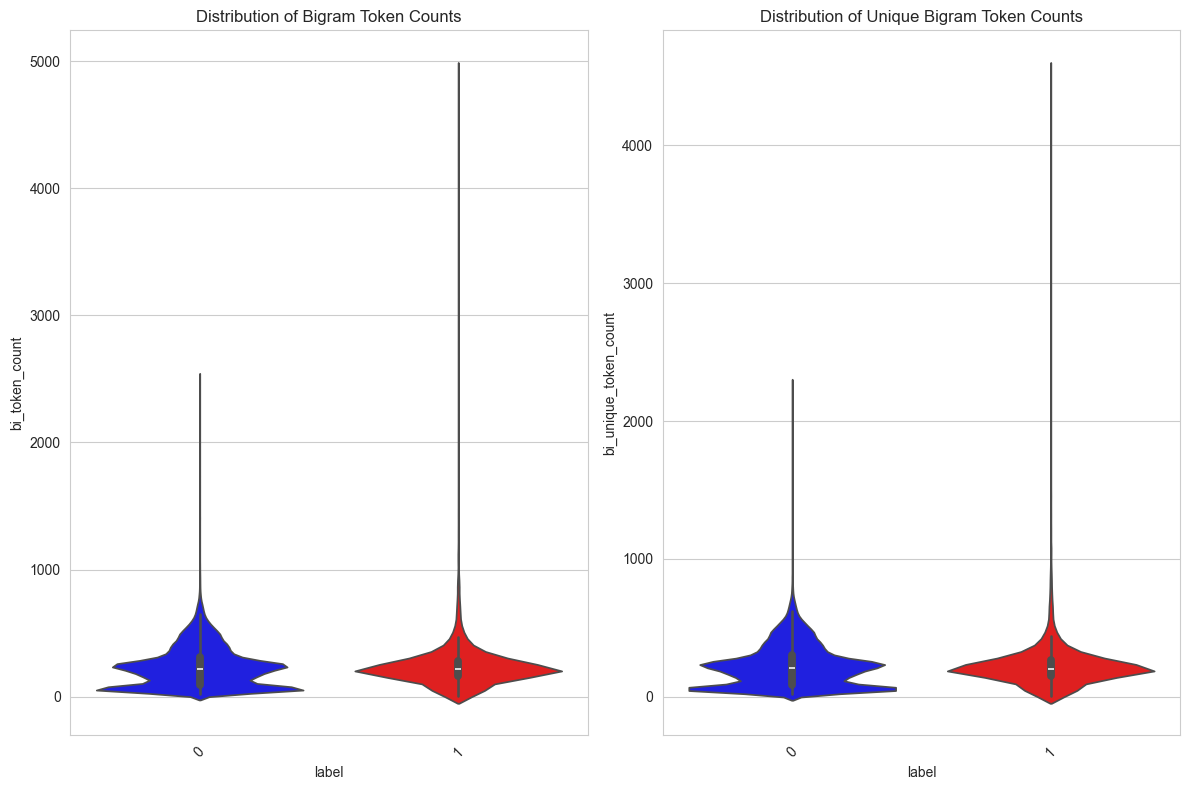

In [ ]:
y_list = ['bi_token_count', 'bi_unique_token_count']
titles = ['Bigram Token Counts', 'Unique Bigram Token Counts']
hf.plot_violin_subplots(x='label', y_list=y_list, df=df_feat,
                        titles=titles, figsize=(12, 8))

In [ ]:
bi_token_stats_by_label = df_feat.groupby('label').agg({'bi_token_count':
                                                         ['mean', 'median', 'std'],
                                                     'bi_unique_token_count':
                                                         ['mean', 'median', 'std']})
bi_token_stats_by_label.columns = ['mean_bi_token_count', 'median_bi_token_count',
                                'std_bi_token_count', 'mean_unique_bi_token_count',
                                'median_unique_bi_token_count',
                                'std_unique_bi_token_count']
bi_token_stats_by_label

,mean_bi_token_count,median_bi_token_count,std_bi_token_count,mean_unique_bi_token_count,median_unique_bi_token_count,std_unique_bi_token_count
label,,,,,,
0,235.549526,220.0,162.078144,224.042329,209.0,153.639981
1,244.534226,215.0,203.068598,230.034370,204.0,186.964416


In [ ]:
display(df_feat['bi_token_count'].describe())
print('95-percentile:')
display(df_feat['bi_token_count'].quantile(0.95))

count    38590.000000
mean       239.600441
std        181.760281
min          6.000000
25%        134.000000
50%        217.000000
75%        299.000000
max       4932.000000
Name: bi_token_count, dtype: float64

95-percentile:


525.0

In [ ]:
percentile_95_bi = int(df_feat['bi_token_count'].quantile(0.95))
df_feat['bi_tokenized_title_text'] = df_feat['bi_tokenized_title_text']\
    .apply(lambda tokens:tokens[:percentile_95_bi])

### 1.5.6. Distributions of Dale Chall score, Flesh reading ease score, Gunning Fog score, and Reading time

#### Main insights and observations:
- True articles tend to be more complex and a bit harder to understand.
- Fake articles tend to be easier, but take a bit longer to read.
- Fake articles have more outliers for all types of scores.

`Dale Chall Readability Score`:
- This score is a readability test that provides an approximate measure of the comprehension difficulty of a text.
- It is calculated based on a formula that considers the average sentence length and the percentage of difficult words (i.e., words not on a list of familiar words).
- The score is typically on a scale between 0 and 10+. Higher scores indicate more difficult texts.
- Lower scores are generally better for easier comprehension, especially for younger readers or those with lower literacy levels.

`Flesch Reading Ease`:
- The Flesch Reading Ease score is another readability test that provides an estimate of the ease of reading and comprehension of a text.
- It is calculated based on the average sentence length and the average number of syllables per word in the text.
- The score ranges from 0 to 100, where higher scores indicate easier readability.
- Scores between 60 and 70 are considered to be easily understood by 13- to 15-year-old students, while scores above 90 are easily understood by an average 11-year-old student.

`Gunning Fog Index`:
- The Gunning Fog Index is a readability formula that estimates the years of formal education required to understand a piece of writing.
- It is calculated based on the average number of words per sentence and the percentage of complex words (words with three or more syllables) in the text.
- The index is typically a decimal number, but it is often rounded up to the nearest whole number to represent the educational level required.
- Higher index values indicate more complex and difficult-to-read texts.

`Reading Time`:
- Reading time is a measure of how long it would take an average reader to read a piece of text at a normal reading speed.
- It is calculated based on the number of words in the text and an assumed average reading speed (usually around 200-250 words per minute).
- The reading time is typically given in minutes and seconds, providing an estimate of the time investment required to consume the text.


In [ ]:
df_feat['dale_chall_score'] = df_feat['title_text'].apply(lambda x:
                                                          textstat.dale_chall_readability_score(x))

df_feat['flesh_reading_ease'] = df_feat['title_text'].apply(lambda x: textstat.flesch_reading_ease(x))

df_feat['gunning_fog'] = df_feat['title_text'].apply(lambda x: textstat.gunning_fog(x))

df_feat['reading_time'] = df_feat['title_text'].apply(lambda x: textstat.reading_time(x))

print('Dale Chall Score of true articles:',
      df_feat[df_feat['label'] == 0]['dale_chall_score'].mean())
print('Dale Chall Score of fake articles:',
      df_feat[df_feat['label'] == 1]['dale_chall_score'].mean())

print('Flesch Reading Ease of true articles:',
      df_feat[df_feat['label'] == 0]['flesh_reading_ease'].mean())
print('Flesch Reading Ease of fake articles:',
      df_feat[df_feat['label'] == 1]['flesh_reading_ease'].mean())

print('Gunning Fog Index of true articles:',
      df_feat[df_feat['label'] == 0]['gunning_fog'].mean())
print('Gunning Fog Index of fake articles:',
      df_feat[df_feat['label'] == 1]['gunning_fog'].mean())

print('Reading Time of true articles:',
      df_feat[df_feat['label'] == 0]['reading_time'].mean())
print('Reading Time of fake articles:',
      df_feat[df_feat['label'] == 1]['reading_time'].mean())

Dale Chall Score of true articles: 9.606683497711293
Dale Chall Score of fake articles: 8.964996838898786
Flesch Reading Ease of true articles: 53.01919116606107
Flesch Reading Ease of fake articles: 60.87084430139662
Gunning Fog Index of true articles: 12.337611721957435
Gunning Fog Index of fake articles: 10.99967814242198
Reading Time of true articles: 29.596716058704168
Reading Time of fake articles: 32.1874808897063


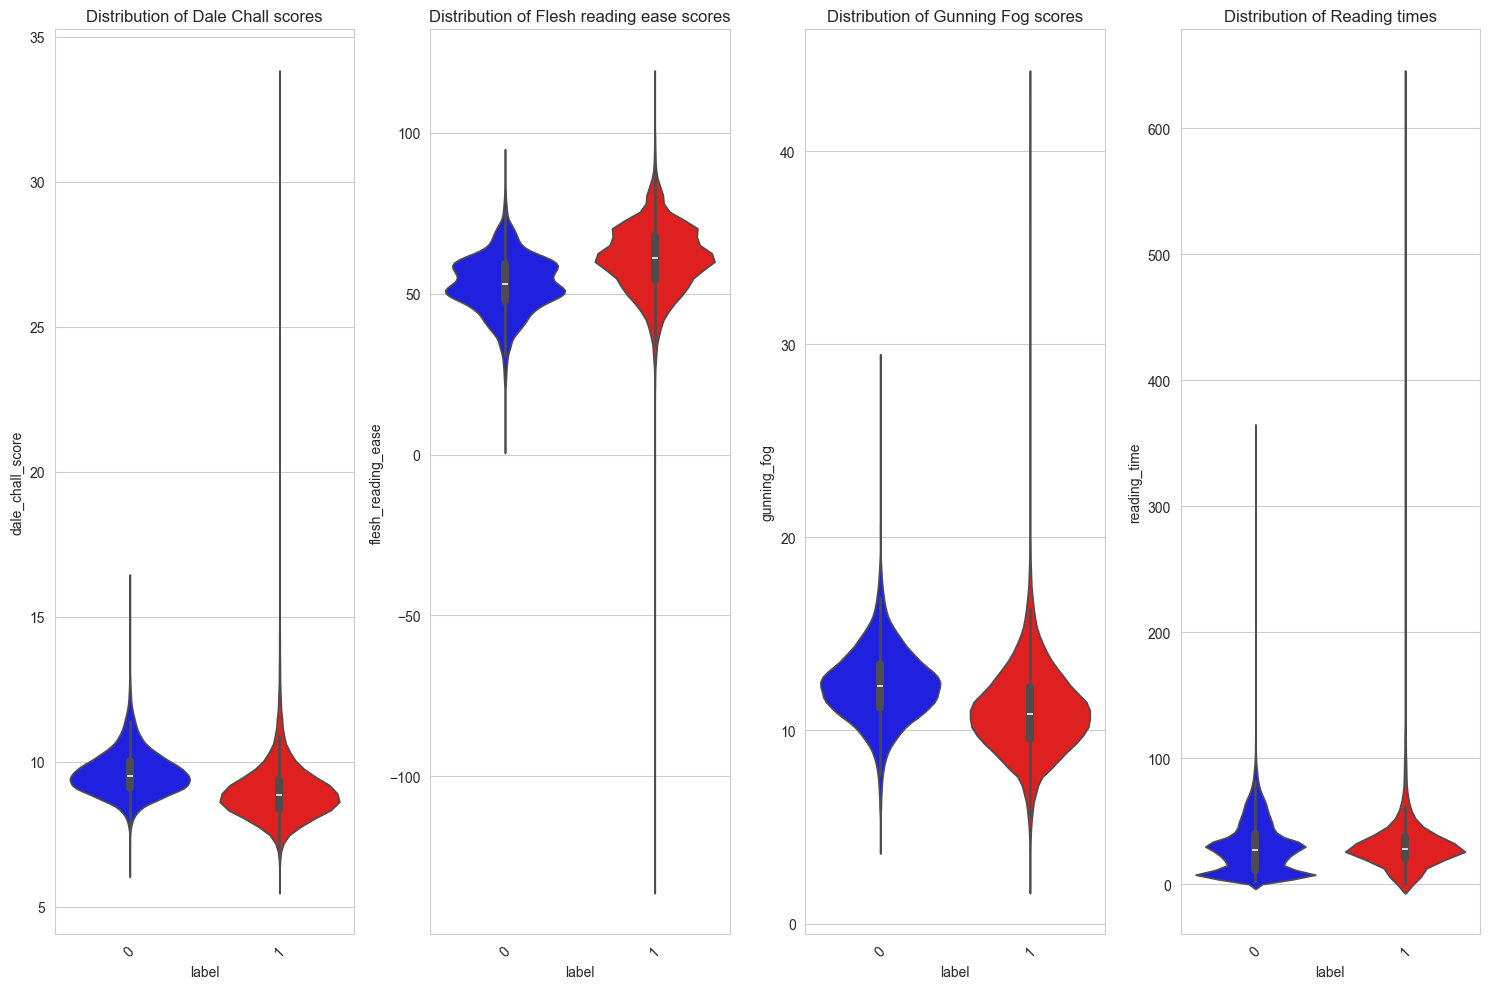

In [ ]:
y_list = ['dale_chall_score', 'flesh_reading_ease', 'gunning_fog', 'reading_time']
titles = ['Dale Chall scores', 'Flesh reading ease scores', 'Gunning Fog scores', 'Reading times']
hf.plot_violin_subplots(x='label', y_list=y_list, df=df_feat, titles=titles)

- True articles tend to be more complex and a bit harder to understand.
- Fake articles tend to be easier, but take a bit longer to read.
- Fake articles have more outliers for all types of scores.

### 1.5.7. Sentiment analysis

#### Main insights and observations:
- Sentiment scores seem to be very similar for true and fake articles.

In [ ]:
def calculate_sentiment(text):
    analysis = TextBlob(text)
    return round(analysis.sentiment.polarity, 2)

In [ ]:
df_feat['sentiment_score'] = df_feat['title_text'].apply(calculate_sentiment)

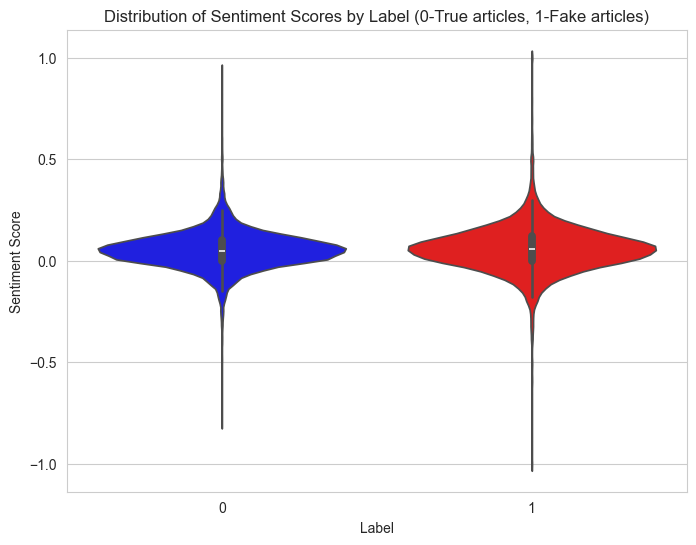

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='label', y='sentiment_score',
               data=df_feat[['label', 'sentiment_score']],
               palette=['blue', 'red'])
plt.xlabel('Label')
plt.ylabel('Sentiment Score')
plt.title('Distribution of Sentiment Scores by Label (0-True articles, 1-Fake articles)')
plt.show()

### 1.5.8. Correlations between numerical features

#### Main insights and conclusions:
- Some of the numerical engineered features are moderately to strongly correlated.
- For label prediction, the most useful additional features may be 'flesh_reading_ease' and 'dale_chall_score'.

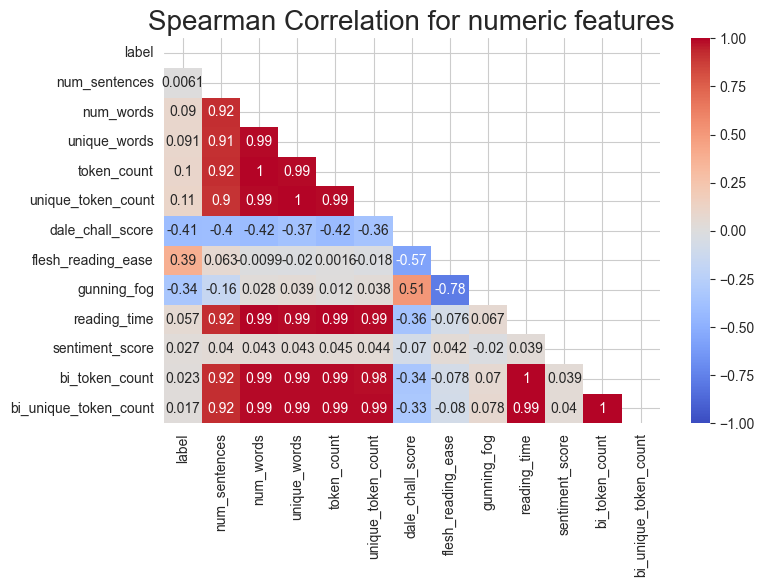

In [ ]:
plt.figure(figsize=(8, 5))
plt.title("Spearman Correlation for numeric features", fontsize=20)
corr_matrix = df_feat.corr(numeric_only=True, method='spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
ax = sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1,
                 cmap="coolwarm", mask=mask)
plt.show()

In [ ]:
df_feat.to_csv("df_feat.csv")

In [ ]:
df_feat = pd.read_csv("df_feat.csv", index_col=0)

# 2. Data preprocessing

## 2.1. Initial preprocessing of data

### 2.1.1. Downsampling the data

Dropping articles published in 2015 and 2018.

In [ ]:
df_feat['date'] = pd.to_datetime(df_feat['date'])
df_reduced = df_feat[~df_feat['date'].dt.year.isin([2015, 2018])]

In [ ]:
df_reduced['date'] = pd.to_datetime(df_reduced['date'])
df_reduced['year'] = df_reduced['date'].dt.year
df_reduced['quarter'] = df_reduced['date'].dt.quarter

In [ ]:
df_reduced.groupby(['year', 'quarter', 'label']).size()

year  quarter  label
2016  1        0        1161
               1        2659
      2        0        1194
               1        2346
      3        0         951
               1        2122
      4        0        1391
               1        2069
2017  1        0        2017
               1        2084
      2        0        1587
               1        1831
      3        0        4247
               1        1565
      4        0        8643
               1        1091
dtype: int64

Downsampling true articles in Q4 and Q4 2017 to match Q1 2017.

In [ ]:
q1_2017_true_count = ((df_reduced['year'] == 2017) & (df_reduced['quarter'] == 1) & (df_reduced['label'] == 0)).sum()

q3_2017_true_indices = df_reduced[(df_reduced['year'] == 2017) & (df_reduced['quarter'] == 3) & (df_reduced['label'] == 0)].index
q4_2017_true_indices = df_reduced[(df_reduced['year'] == 2017) & (df_reduced['quarter'] == 4) & (df_reduced['label'] == 0)].index

q3_2017_true_excess = len(q3_2017_true_indices) - q1_2017_true_count
q4_2017_true_excess = len(q4_2017_true_indices) - q1_2017_true_count

if q3_2017_true_excess > 0:
    downsampled_indices = np.random.choice(q3_2017_true_indices, size=q3_2017_true_excess, replace=False)
    df_reduced = df_reduced.drop(downsampled_indices)

if q4_2017_true_excess > 0:
    downsampled_indices = np.random.choice(q4_2017_true_indices, size=q4_2017_true_excess, replace=False)
    df_reduced = df_reduced.drop(downsampled_indices)

df_reduced.reset_index(drop=True, inplace=True)

In [ ]:
df_reduced.to_csv("df_reduced.csv")

In [111]:
df_reduced = pd.read_csv("/content/drive/MyDrive/Turing College/Module_4-Deep_Learning/Project_M4_S4_FakeNewsClassifier/df_reduced.csv", index_col=0)

In [ ]:
df_reduced.shape

(28102, 24)

### 2.1.2. Train-val-test split

In [112]:
stratify_cols = ['label', 'year', 'quarter']

train_df, tmp_df, y_train, y_tmp = train_test_split(df_reduced,
                                                    df_reduced['label'],
                                                    test_size=0.4,
                                                    stratify=df_reduced[stratify_cols],
                                                    random_state=42)
val_df, test_df, y_val, y_test = train_test_split(tmp_df, y_tmp,
                                                  test_size=0.5,
                                                  stratify=tmp_df[stratify_cols],
                                                  random_state=42)

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

print("Shape of training df:", train_df.shape)
print("Shape of validation df:", val_df.shape)
print("Shape of testing df:", test_df.shape)

Shape of training df: (16861, 24)
Shape of validation df: (5620, 24)
Shape of testing df: (5621, 24)


In [113]:
X_train_text = train_df['title_text']
X_val_text = val_df['title_text']
X_test_text = test_df['title_text']

X_train_tokenized_text = train_df['tokenized_title_text']
X_val_tokenized_text = val_df['tokenized_title_text']
X_test_tokenized_text = test_df['tokenized_title_text']

X_train_bi_tokenized_text = train_df['bi_tokenized_title_text']
X_val_bi_tokenized_text = val_df['bi_tokenized_title_text']
X_test_bi_tokenized_text = test_df['bi_tokenized_title_text']

y_train = train_df['label'].values
y_val = val_df['label'].values
y_test = test_df['label'].values

X_train_text_short, _, y_train_short, _ = train_test_split(train_df['title_text'],
                                                            train_df['label'],
                                                            train_size=5000,
                                                            stratify=train_df[['label', 'year', 'quarter']],
                                                            random_state=42)

X_train_tokenized_text_short = train_df.loc[X_train_text_short.index, 'tokenized_title_text']
X_train_bi_tokenized_text_short = train_df.loc[X_train_text_short.index, 'bi_tokenized_title_text']

## 2.2. Preprocessing data for ML models

We will train the classifier with Logistic Regression, Random Forest, DecisionTree, Naive Bayes, and XGBoost. We will create preprocessing pipelines for all model groups.

In [ ]:
base_ml_pipeline = Pipeline([
    ('preprocess', FunctionTransformer(hf.preprocess_ml, validate=False,
                                       kw_args={'remove_stopwords': True,
                                                'remove_punctuation': True})),
    ('vectorize', TfidfVectorizer(stop_words=None)),
])

tree_ml_pipeline = Pipeline([
    ('preprocess', FunctionTransformer(hf.preprocess_ml, validate=False,
                                       kw_args={'remove_stopwords': True,
                                                'remove_punctuation': True})),
    ('vectorize', CountVectorizer(stop_words=None)),
])

In [ ]:
base_ml_pipeline.fit(X_train_tokenized_text)

X_train_ml = base_ml_pipeline.transform(X_train_tokenized_text)
X_train_ml_short = base_ml_pipeline.transform(X_train_tokenized_text_short)
X_val_ml = base_ml_pipeline.transform(X_val_tokenized_text)
X_test_ml = base_ml_pipeline.transform(X_test_tokenized_text)

scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_ml)
X_train_scaled_short = scaler.transform(X_train_ml_short)
X_val_scaled = scaler.transform(X_val_ml)
X_test_scaled = scaler.transform(X_test_ml)

In [ ]:
tree_ml_pipeline.fit(X_train_tokenized_text)

X_train_tree = tree_ml_pipeline.transform(X_train_tokenized_text)
X_train_tree_short = tree_ml_pipeline.transform(X_train_tokenized_text_short)
X_val_tree = tree_ml_pipeline.transform(X_val_tokenized_text)
X_test_tree = tree_ml_pipeline.transform(X_test_tokenized_text)

In [ ]:
vectorizer_bigram = TfidfVectorizer(ngram_range=(2, 2))
vectorizer_bigram.fit(X_train_bi_tokenized_text)

X_train_bigram = vectorizer_bigram.transform(X_train_bi_tokenized_text)
X_train_bigram_short = vectorizer_bigram.transform(X_train_bi_tokenized_text_short)
X_val_bigram = vectorizer_bigram.transform(X_val_bi_tokenized_text)
X_test_bigram = vectorizer_bigram.transform(X_test_bi_tokenized_text)

In [ ]:
vectorizer_bigram_countv = CountVectorizer(ngram_range=(2, 2))
vectorizer_bigram_countv.fit(X_train_bi_tokenized_text)

X_train_bigram_cv = vectorizer_bigram_countv.transform(X_train_bi_tokenized_text)
X_train_bigram_cv_short = vectorizer_bigram_countv.transform(X_train_bi_tokenized_text_short)
X_val_bigram_cv = vectorizer_bigram_countv.transform(X_val_bi_tokenized_text)
X_test_bigramcv = vectorizer_bigram_countv.transform(X_test_bi_tokenized_text)

In [ ]:
save_npz('X_train_ml.npz', X_train_ml)
save_npz('X_train_ml_short.npz', X_train_ml_short)
save_npz('X_val_ml.npz', X_val_ml)
save_npz('X_test_ml.npz', X_test_ml)
save_npz('X_train_scaled.npz', X_train_scaled)
save_npz('X_train_scaled_short.npz', X_train_scaled_short)
save_npz('X_val_scaled.npz', X_val_scaled)
save_npz('X_test_scaled.npz', X_test_scaled)
save_npz('X_train_ml_cvec.npz', X_train_tree)
save_npz('X_train_ml_cvec_short.npz', X_train_tree_short)
save_npz('X_val_ml_cvec.npz', X_val_tree)
save_npz('X_test_ml_cvec.npz', X_test_tree)

np.save('y_train.npy', y_train)
np.save('y_train_short.npy', y_train_short)
np.save('y_val.npy', y_val)
np.save('y_test.npy', y_test)

In [ ]:
save_npz('X_train_bigram.npz', X_train_bigram)
save_npz('X_train_bigram_short.npz', X_train_bigram_short)
save_npz('X_val_bigram.npz', X_val_bigram)
save_npz('X_test_bigram.npz', X_test_bigram)

save_npz('X_train_bigram_cv.npz', X_train_bigram)
save_npz('X_train_bigram_cv_short.npz', X_train_bigram_short)
save_npz('X_val_bigram_cv.npz', X_val_bigram)
save_npz('X_test_bigram_cv.npz', X_test_bigram)

In [ ]:
X_train_ml = load_npz('X_train_ml.npz')
X_train_ml_short = load_npz('X_train_ml_short.npz')
X_val_ml = load_npz('X_val_ml.npz')
X_test_ml = load_npz('X_test_ml.npz')
X_train_scaled = load_npz('X_train_scaled.npz')
X_train_scaled_short = load_npz('X_train_scaled_short.npz')
X_val_scaled = load_npz('X_val_scaled.npz')
X_test_scaled = load_npz('X_test_scaled.npz')
X_train_ml_cvec = load_npz('X_train_ml_cvec.npz')
X_train_ml_cvec_short = load_npz('X_train_ml_cvec_short.npz')
X_val_ml_cvec = load_npz('X_val_ml_cvec.npz')
X_test_ml_cvec = load_npz('X_test_ml_cvec.npz')

y_train = np.load('y_train.npy')
y_train_short = np.load('y_train_short.npy')
y_val = np.load('y_val.npy')
y_test = np.load('y_test.npy')

In [ ]:
X_train_bigram = load_npz('X_train_bigram.npz')
X_train_bigram_short = load_npz('X_train_bigram_short.npz')
X_val_bigram = load_npz('X_val_bigram.npz')
X_test_bigram = load_npz('X_test_bigram.npz')

X_train_bigram_cv = load_npz('X_train_bigram_cv.npz')
X_train_bigram_cv_short = load_npz('X_train_bigram_cv_short.npz')
X_val_bigram_cv = load_npz('X_val_bigram_cv.npz')
X_test_bigram_cv = load_npz('X_test_bigram_cv.npz')

## 2.3. Preprocessing data for DL models

In [7]:
class TextDataset(Dataset):
    def __init__(self, texts: List[str], labels, tokenizer_name: str, max_length: int):
        self.texts = texts
        self.labels = labels
        self.tokenizer_name = tokenizer_name
        self.max_length = max_length
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

        if tokenizer_name == 'longformer':
            self.tokenizer = LongformerTokenizer.from_pretrained('allenai/longformer-base-4096')
        elif tokenizer_name == 'roberta':
            self.tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
        elif tokenizer_name == 'distilbert':
            self.tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
        elif tokenizer_name == 'bigbird':
            self.tokenizer = BigBirdTokenizer.from_pretrained('google/bigbird-roberta-base')
        else:
            raise ValueError("Invalid tokenizer name. Choose 'longformer', 'roberta', 'distilbert', or 'bigbird'.")

    def __len__(self) -> int:
        return len(self.texts)

    def __getitem__(self, idx: int) -> Tuple[torch.Tensor, torch.Tensor, torch.Tensor]:
        if idx >= len(self):
            raise IndexError(f"Index {idx} is out of range for dataset of length {len(self)}")
        text = self.texts[idx]
        encoded_input = self.tokenizer(text, padding='max_length', truncation=True,
                                       max_length=self.max_length, return_tensors='pt')
        input_ids = encoded_input['input_ids'].squeeze(0).to(self.device)
        attention_mask = encoded_input['attention_mask'].squeeze(0).to(self.device)
        label = torch.tensor(self.labels[idx], dtype=torch.float).to(self.device)
        return input_ids, attention_mask, label

In [115]:
train_dataset_lf = TextDataset(X_train_text, y_train, tokenizer_name='longformer', max_length=1024)
train_dataset_lf_short = TextDataset(X_train_text, y_train, tokenizer_name='longformer', max_length=512)
val_dataset_lf = TextDataset(X_val_text, y_val, tokenizer_name='longformer', max_length=1024)
test_dataset_lf = TextDataset(X_test_text, y_test, tokenizer_name='longformer', max_length=1024)

train_dataset_roberta = TextDataset(X_train_text, y_train, tokenizer_name='roberta', max_length=512)
val_dataset_roberta = TextDataset(X_val_text, y_val, tokenizer_name='roberta', max_length=512)
test_dataset_roberta = TextDataset(X_test_text, y_test, tokenizer_name='roberta', max_length=512)

train_dataset_distilbert = TextDataset(X_train_text, y_train, tokenizer_name='distilbert', max_length=512)
val_dataset_distilbert = TextDataset(X_val_text, y_val, tokenizer_name='distilbert', max_length=512)
test_dataset_distilbert = TextDataset(X_test_text, y_test, tokenizer_name='distilbert', max_length=512)

train_dataset_bigbird = TextDataset(X_train_text, y_train, tokenizer_name='bigbird', max_length=1024)
train_dataset_bigbird_short = TextDataset(X_train_text, y_train, tokenizer_name='bigbird', max_length=512)
val_dataset_bigbird = TextDataset(X_val_text, y_val, tokenizer_name='bigbird', max_length=1024)
test_dataset_bigbird = TextDataset(X_test_text, y_test, tokenizer_name='bigbird', max_length=1024)

In [116]:
datasets = {
    "train_dataset_lf": train_dataset_lf,
    "train_dataset_lf_short": train_dataset_lf_short,
    "val_dataset_lf": val_dataset_lf,
    "test_dataset_lf": test_dataset_lf,
    "train_dataset_roberta": train_dataset_roberta,
    "val_dataset_roberta": val_dataset_roberta,
    "test_dataset_roberta": test_dataset_roberta,
    "train_dataset_distilbert": train_dataset_distilbert,
    "val_dataset_distilbert": val_dataset_distilbert,
    "test_dataset_distilbert": test_dataset_distilbert,
    "train_dataset_bigbird": train_dataset_bigbird,
    "train_dataset_bigbird_short": train_dataset_bigbird_short,
    "val_dataset_bigbird": val_dataset_bigbird,
    "test_dataset_bigbird": test_dataset_bigbird,
    "y_train": y_train,
    "y_train_short": y_train_short,
    "y_val": y_val,
    "y_test": y_test
}

with open("/content/drive/MyDrive/Turing College/Module_4-Deep_Learning/Project_M4_S4_FakeNewsClassifier/dl_datasets.pkl", "wb") as f:
    pickle.dump(datasets, f)

In [12]:
bigbirdtokenizer = BigBirdTokenizer.from_pretrained('google/bigbird-roberta-base')
distilberttokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [11]:
with open("/content/drive/MyDrive/Turing College/Module_4-Deep_Learning/Project_M4_S4_FakeNewsClassifier/dl_datasets.pkl", "rb") as f:
    loaded_datasets = pickle.load(f)

train_dataset_lf = loaded_datasets["train_dataset_lf"]
train_dataset_lf_short = loaded_datasets["train_dataset_lf_short"]
val_dataset_lf = loaded_datasets["val_dataset_lf"]
test_dataset_lf = loaded_datasets["test_dataset_lf"]
train_dataset_roberta = loaded_datasets["train_dataset_roberta"]
val_dataset_roberta = loaded_datasets["val_dataset_roberta"]
test_dataset_roberta = loaded_datasets["test_dataset_roberta"]
train_dataset_distilbert = loaded_datasets["train_dataset_distilbert"]
val_dataset_distilbert = loaded_datasets["val_dataset_distilbert"]
test_dataset_distilbert = loaded_datasets["test_dataset_distilbert"]
train_dataset_bigbird = loaded_datasets["train_dataset_bigbird"]
train_dataset_bigbird_short = loaded_datasets["train_dataset_bigbird_short"]
val_dataset_bigbird = loaded_datasets["val_dataset_bigbird"]
test_dataset_bigbird = loaded_datasets["test_dataset_bigbird"]
y_train = loaded_datasets["y_train"]
y_train_short = loaded_datasets["y_train_short"]
y_val = loaded_datasets["y_val"]
y_test = loaded_datasets["y_test"]

# 3. Building ML and DL models

## 3.1. Building a classifier with ML algorithms

### 3.1.1. Choosing the top-3 ML models

First, we will try out unoptimized models with unigram and bigram tokenized text data.

In [ ]:
classifiers = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'Naive Bayes': MultinomialNB(),
    'XGBoost': XGBClassifier(scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train), verbose=0, random_state=42),
}

In [ ]:
print("Using Unigram Text Data:")
for name, clf in classifiers.items():
    print(f"\n{name}:")
    hf.train_and_evaluate(clf, X_train_ml_cvec, X_val_ml_cvec, y_train, y_val)

Using Unigram Text Data:

Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2467
           1       0.98      0.98      0.98      3153

    accuracy                           0.97      5620
   macro avg       0.97      0.97      0.97      5620
weighted avg       0.97      0.97      0.97      5620

ROC AUC Score: 0.9965595977913855

Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      2467
           1       0.96      0.97      0.96      3153

    accuracy                           0.96      5620
   macro avg       0.96      0.96      0.96      5620
weighted avg       0.96      0.96      0.96      5620

ROC AUC Score: 0.9930336387026157

Decision Tree:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2467
           1       0.92      0.91      0.91      3153

    accuracy                       

In [ ]:
print("Using Bigram Text Data:")
for name, clf in classifiers.items():
    print(f"\n{name}:")
    hf.train_and_evaluate(clf, X_train_bigram_cv, X_val_bigram_cv, y_train, y_val)

Using Bigram Text Data:

Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2467
           1       0.99      0.96      0.98      3153

    accuracy                           0.97      5620
   macro avg       0.97      0.97      0.97      5620
weighted avg       0.97      0.97      0.97      5620

ROC AUC Score: 0.9962939922100172

Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2467
           1       0.98      0.96      0.97      3153

    accuracy                           0.97      5620
   macro avg       0.97      0.97      0.97      5620
weighted avg       0.97      0.97      0.97      5620

ROC AUC Score: 0.9956105013710314

Decision Tree:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2467
           1       0.94      0.92      0.93      3153

    accuracy                        

- The top-3 performing models are:
    -  XGBoost(Bigram: {roc-auc = 0.998, F1 = 0.98}, Unigram: {roc-auc = 0.994, F1 = 0.97})
    -  Logistic Regression (Bigram: {roc-auc = 0.996, F1 = 0.97}, Unigram: {roc-auc = 0.996, F1 = 0.97})
    -  Random Forest (Bigram: {roc-auc = 0.996, F1 = 0.97}, Unigram: {roc-auc = 0.993, F1 = 0.96})
- Bigram tokenization works better than or as good as unigram tokenization for the unoptimized models.

### 3.1.2. Improving the top-3 ML models with hyperparameter tuning

In [ ]:
classifiers_and_ranges = {
    'Logistic Regression': {
        'classifier': LogisticRegression(class_weight='balanced',
                                         random_state=42),
        'feature_ranges': {
            'C': (1e-6, 1e6),
        }
    },
    'Random Forest': {
        'classifier': RandomForestClassifier(class_weight='balanced',
                                             random_state=42),
        'feature_ranges': {
            'n_estimators': (10, 500),
            'max_depth': (2, 20),
            'min_samples_split': (2, 10),
        }
    },
    'XGBoost': {
        'classifier': XGBClassifier(scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train),
                                    verbose=0, random_state=42),
        'feature_ranges': {
            'eta': (0.01, 1.0),
            'max_depth': (2, 10),
            'min_child_weight': (1, 10),
            'subsample': (0.5, 1.0),
        }
    }
}

In [ ]:
for classifier_name, config in classifiers_and_ranges.items():
    classifier = config['classifier']
    feature_ranges = config['feature_ranges']
    hf.optimize_classifier(classifier_name, classifier, X_train_bigram_cv, y_train,
                           X_val_bigram_cv, y_val, feature_ranges, trials=30)

[I 2024-05-14 23:18:45,750] A new study created in memory with name: no-name-1d82c49f-af81-4b1d-af18-090de5c7e466


Optimizing Logistic Regression:


[I 2024-05-14 23:18:55,852] Trial 0 finished with value: 0.9975857661120447 and parameters: {'C': 140392.26642889576}. Best is trial 0 with value: 0.9975857661120447.
[I 2024-05-14 23:19:06,911] Trial 1 finished with value: 0.9975799808985105 and parameters: {'C': 675556.5247555639}. Best is trial 0 with value: 0.9975857661120447.
[I 2024-05-14 23:19:18,396] Trial 2 finished with value: 0.9975801094588113 and parameters: {'C': 582735.0900073997}. Best is trial 0 with value: 0.9975857661120447.
[I 2024-05-14 23:19:30,540] Trial 3 finished with value: 0.997581909303022 and parameters: {'C': 346679.9768893365}. Best is trial 0 with value: 0.9975857661120447.
[I 2024-05-14 23:19:43,122] Trial 4 finished with value: 0.9975828092251272 and parameters: {'C': 269197.2453236275}. Best is trial 0 with value: 0.9975857661120447.
[I 2024-05-14 23:19:56,455] Trial 5 finished with value: 0.9975807522603151 and parameters: {'C': 454954.45460834674}. Best is trial 0 with value: 0.9975857661120447.
[I 

Best hyperparameters for Logistic Regression:
C: 2937.0343996451143
Best Logistic Regression ROC-AUC: 0.9980
Optimizing Random Forest:


[I 2024-05-14 23:24:08,007] Trial 0 finished with value: 0.9898913035513112 and parameters: {'n_estimators': 155, 'max_depth': 14, 'min_samples_split': 7}. Best is trial 0 with value: 0.9898913035513112.
[I 2024-05-14 23:24:36,450] Trial 1 finished with value: 0.9891316407341256 and parameters: {'n_estimators': 459, 'max_depth': 10, 'min_samples_split': 4}. Best is trial 0 with value: 0.9898913035513112.
[I 2024-05-14 23:24:43,455] Trial 2 finished with value: 0.9864260892046501 and parameters: {'n_estimators': 169, 'max_depth': 6, 'min_samples_split': 2}. Best is trial 0 with value: 0.9898913035513112.
[I 2024-05-14 23:24:45,833] Trial 3 finished with value: 0.9680245462753447 and parameters: {'n_estimators': 47, 'max_depth': 6, 'min_samples_split': 4}. Best is trial 0 with value: 0.9898913035513112.
[I 2024-05-14 23:24:53,765] Trial 4 finished with value: 0.9855517505991873 and parameters: {'n_estimators': 134, 'max_depth': 9, 'min_samples_split': 2}. Best is trial 0 with value: 0.98

Best hyperparameters for Random Forest:
n_estimators: 206
max_depth: 20
min_samples_split: 6
Best Random Forest ROC-AUC: 0.9921
Optimizing XGBoost:


[I 2024-05-14 23:36:50,309] Trial 0 finished with value: 0.9964931321158931 and parameters: {'eta': 0.2524645469542047, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.6074029501129898}. Best is trial 0 with value: 0.9964931321158931.
[I 2024-05-14 23:39:51,857] Trial 1 finished with value: 0.9981441034982416 and parameters: {'eta': 0.4626877555503302, 'max_depth': 8, 'min_child_weight': 2, 'subsample': 0.9895684404457248}. Best is trial 1 with value: 0.9981441034982416.
[I 2024-05-14 23:42:33,043] Trial 2 finished with value: 0.9967827784735033 and parameters: {'eta': 0.5061892967593948, 'max_depth': 10, 'min_child_weight': 8, 'subsample': 0.7414902348711776}. Best is trial 1 with value: 0.9981441034982416.
[I 2024-05-14 23:43:31,676] Trial 3 finished with value: 0.9973244030206013 and parameters: {'eta': 0.38123344588371516, 'max_depth': 3, 'min_child_weight': 8, 'subsample': 0.6009799579328153}. Best is trial 1 with value: 0.9981441034982416.
[I 2024-05-14 23:46:10,021] Trial 

Best hyperparameters for XGBoost:
eta: 0.3785892308941624
max_depth: 6
min_child_weight: 2
subsample: 0.8605936275064994
Best XGBoost ROC-AUC: 0.9983


- XGBoost (ROC-AUC: 0.9983):
    - eta: 0.3785892308941624
    - max_depth: 6
    - min_child_weight: 2
    - subsample: 0.8605936275064994
- Logistic Regression (ROC-AUC: 0.9980):
    - C: 2937.0343996451143
- Random Forest (ROC-AUC: 0.9921):
    - n_estimators: 206
    - max_depth: 20
    - min_samples_split: 6

### 3.1.3. Evaluating the top performing ML model on test data

In [ ]:
xgb_cls = XGBClassifier(scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train),
                            verbose=0, random_state=42, eta=0.3785892308941624, max_depth=6,
                            min_child_weight=2, subsample=0.8605936275064994)
xgb_cls.fit(X_train_bigram_cv, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.3785892308941624,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2467
           1       0.99      0.97      0.98      3154

    accuracy                           0.98      5621
   macro avg       0.98      0.98      0.98      5621
weighted avg       0.98      0.98      0.98      5621

ROC AUC Score: 0.998249563868942


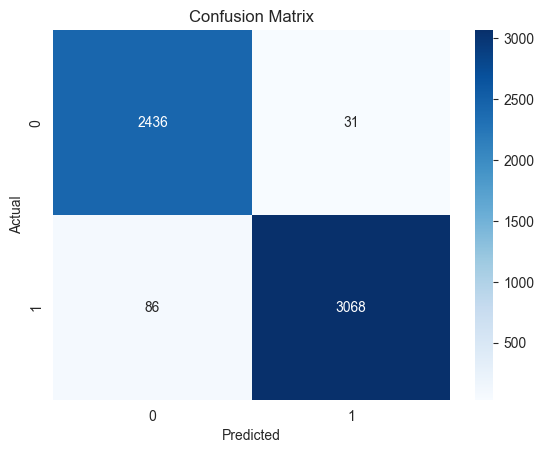

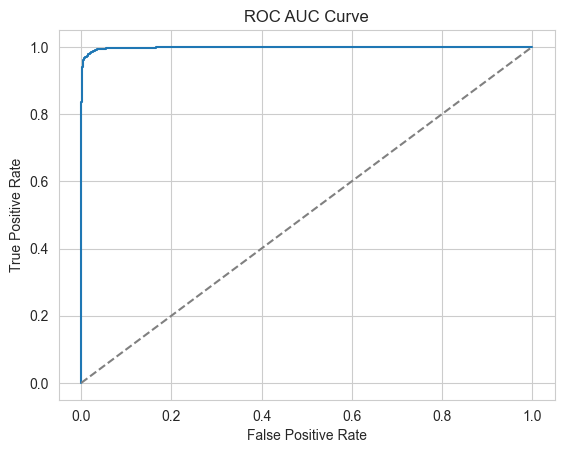

(array([0, 0, 1, ..., 1, 1, 1]),
 array([4.8416887e-06, 4.0296521e-03, 9.9487442e-01, ..., 9.9995542e-01,
        9.9999857e-01, 9.9999440e-01], dtype=float32),
 None)

In [ ]:
hf.train_and_evaluate(xgb_cls, X_val = X_test_bigram_cv, y_val = y_test,
                      fit=False, plot_conf_matrix=True, plot_roc_curve=True)

In [ ]:
dump(xgb_cls, 'xgb_classifier.joblib')
with open('xgb_classifier.pkl', 'wb') as f:
    pickle.dump(xgb_cls, f)

In [ ]:
xgb_cls = load('/content/drive/MyDrive/Turing College/Module_4-Deep_Learning/Project_M4_S4_FakeNewsClassifier/xgb_classifier.joblib')

- The optimized model trained on bigram tokenized text data is performing relatively well and is able to separate fake and true articles. ROC AUC Score is 0.9982, F1-score is 0.98.

Let's have a look at a few misclassified items:

In [ ]:
label_names = {0: "True", 1: "Fake"}
y_pred = xgb_cls.predict(X_test_bigram_cv)
misclassified_indices = np.where(y_pred != y_test)[0][:5]
misclassified_items = [X_test_text[i][:100] for i in misclassified_indices]

for index, item in zip(misclassified_indices, misclassified_items):
    true_label_name = label_names[y_test[index]]
    predicted_label_name = label_names[y_pred[index]]
    print(f"True label: {true_label_name} article, Predicted label: {predicted_label_name} article")
    print("Text:", item, "...")
    print()

True label: Fake article, Predicted label: True article
Text: oops! ukraine caught colluding with democrats to help hillary win electionpresident poroshenko scram ...

True label: Fake article, Predicted label: True article
Text: walmart removes controversial t-shirt but black lives matter tees remain. walmart has pulled all its ...

True label: Fake article, Predicted label: True article
Text: stunning! heres how trump shocked the media and won the woman vote. trump won among several groups o ...

True label: Fake article, Predicted label: True article
Text: wikileaks email shows clinton foundation funds used for lavish wedding of spoiled brat chelsea clint ...

True label: True article, Predicted label: Fake article
Text: commentary: party leaders often disliked their nominee. its the public vitriol thats new.. gop leade ...



## 3.2. Building a classifier with pre-trained DL models

We will use pre-trained BigBird and DistilBERT models.

- ``BigBird``: Optimized for handling long sequences using sparse attention, making it suitable for tasks involving long documents. [More info on BigBird](https://huggingface.co/docs/transformers/en/model_doc/big_bird).
- ``DistilBERT``: A distilled version of BERT that is smaller and faster while retaining most of BERT's accuracy. [More info on DistilBERT](https://huggingface.co/docs/transformers/en/model_doc/distilbert).


Main structure of the model:
- Feature extractor (BigBird or DistilBERT).
- Additional fully connected layer with dropout.
- Classification head.

In [13]:
from model_class import FakeNewsClassifier
from optuna_objective_class import Objective

### 3.2.1. Training and optimization of the DL classifier

We will train two models for 1 epoch - one using BigBird and one using DistilBERT as a feature extractor. Then we'll optimize and train the best-performing model.

In [ ]:
class Trainer:
    def __init__(self, model, train_dataset, val_dataset, max_trainer_epochs=1):
        self.model = model
        self.train_dataset = train_dataset
        self.val_dataset = val_dataset
        self.max_trainer_epochs = max_trainer_epochs

    def train(self):
        batch_size = 8
        train_loader = torch.utils.data.DataLoader(self.train_dataset,
                                                   batch_size=batch_size,
                                                   shuffle=True,
                                                   )
        val_loader = torch.utils.data.DataLoader(self.val_dataset,
                                                 batch_size=batch_size,
                                                 shuffle=False,
                                                 )
        trainer = pl.Trainer(max_epochs=self.max_trainer_epochs)
        trainer.fit(self.model, train_loader, val_loader)

In [ ]:
bigbird_model = FakeNewsClassifier(model_name='bigbird', additional_fc=True)
bb_trainer = Trainer(bigbird_model, train_dataset_bigbird,
                     val_dataset_bigbird)
bb_trainer.train()

Some weights of BigBirdForSequenceClassification were not initialized from the model checkpoint at google/bigbird-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


num_features after additional_fc: 384


INFO:pytorch_lightning.callbacks.model_summary:
  | Name              | Type                             | Params
-----------------------------------------------------------------------
0 | dropout           | Dropout                          | 0     
1 | feature_extractor | BigBirdForSequenceClassification | 127 M 
2 | classifier_head   | Linear                           | 385   
3 | train_roc_auc     | BinaryAUROC                      | 0     
4 | val_roc_auc       | BinaryAUROC                      | 0     
5 | train_accuracy    | BinaryAccuracy                   | 0     
6 | val_accuracy      | BinaryAccuracy                   | 0     
7 | train_f1          | BinaryF1Score                    | 0     
8 | val_f1            | BinaryF1Score                    | 0     
-----------------------------------------------------------------------
295 K     Trainable params
127 M     Non-trainable params
127 M     Total params
511.058   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

avg_val_loss: 0.2808046042919159
avg_val_acc: 0.9416370391845703
avg_val_f1: 0.9459854364395142
avg_val_roc_auc: 0.9783976674079895
avg_train_loss: 0.4362395703792572


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


In [ ]:
distilbert_model = FakeNewsClassifier(model_name='distilbert', additional_fc=True)
db_trainer = Trainer(distilbert_model, train_dataset_distilbert,
                     val_dataset_distilbert)
db_trainer.train()

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name              | Type                                | Params
--------------------------------------------------------------------------
0 | dropout           | Dropout                 

num_features after additional_fc: 384


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

avg_val_loss: 0.474345326423645
avg_val_acc: 0.9062277674674988
avg_val_f1: 0.9115467071533203
avg_val_roc_auc: 0.9661487340927124
avg_train_loss: 0.5713445544242859


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


- Unoptimized BigBird performs a bit better than DistilBERT. We will perform hyperparameter tuning to find optimal batch size and learning rate.

In [ ]:
objective = Objective(train_dataset_bigbird, val_dataset_bigbird,
                      model_name='bigbird',
                      additional_fc=True, max_epochs=1)

study = optuna.create_study(direction='minimize')

study.optimize(objective, n_trials=5)

best_params = study.best_params
best_batch_size = best_params['batch_size']
best_learning_rate = best_params['learning_rate']

print(f'Best batch size: {best_batch_size}')
print(f'Best learning rate: {best_learning_rate}')

[I 2024-05-20 10:28:41,802] A new study created in memory with name: no-name-4a68836e-8375-4b0c-a8b9-166e3dba6b69


pytorch_model.bin:   0%|          | 0.00/513M [00:00<?, ?B/s]

Some weights of BigBirdForSequenceClassification were not initialized from the model checkpoint at google/bigbird-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


num_features after additional_fc: 384


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:You are using a CUDA device ('NVIDIA L4') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name              | Type                             | Params
-----------------------------------------------------------------------
0 | dropout   

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


avg_val_loss: 0.5202926993370056
avg_val_acc: 0.8624554872512817
avg_val_f1: 0.8856493234634399
avg_val_roc_auc: 0.9678609371185303
avg_train_loss: 0.6026699542999268


[I 2024-05-20 10:52:56,262] Trial 0 finished with value: 0.5202926993370056 and parameters: {'batch_size': 16, 'learning_rate': 0.0003833399419036152}. Best is trial 0 with value: 0.5202926993370056.
Some weights of BigBirdForSequenceClassification were not initialized from the model checkpoint at google/bigbird-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_ligh

num_features after additional_fc: 384


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


avg_val_loss: 0.3502767086029053
avg_val_acc: 0.9032028317451477
avg_val_f1: 0.9120689630508423
avg_val_roc_auc: 0.9774444699287415
avg_train_loss: 0.4890151917934418


[I 2024-05-20 11:17:09,126] Trial 1 finished with value: 0.3502767086029053 and parameters: {'batch_size': 8, 'learning_rate': 0.0006345033826192599}. Best is trial 1 with value: 0.3502767086029053.
Some weights of BigBirdForSequenceClassification were not initialized from the model checkpoint at google/bigbird-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_light

num_features after additional_fc: 384


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


avg_val_loss: 0.30291295051574707
avg_val_acc: 0.9268683195114136
avg_val_f1: 0.9327067732810974
avg_val_roc_auc: 0.9771620631217957
avg_train_loss: 0.4512808918952942


[I 2024-05-20 11:41:24,497] Trial 2 finished with value: 0.30291295051574707 and parameters: {'batch_size': 8, 'learning_rate': 0.0008244505022432788}. Best is trial 2 with value: 0.30291295051574707.
Some weights of BigBirdForSequenceClassification were not initialized from the model checkpoint at google/bigbird-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lig

num_features after additional_fc: 384


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


avg_val_loss: 0.6728755235671997
avg_val_acc: 0.5610320568084717
avg_val_f1: 0.7144923806190491
avg_val_roc_auc: 0.9277706742286682
avg_train_loss: 0.6894170045852661


[I 2024-05-20 12:05:54,462] Trial 3 finished with value: 0.6728755235671997 and parameters: {'batch_size': 32, 'learning_rate': 3.6153423647126986e-05}. Best is trial 2 with value: 0.30291295051574707.
Some weights of BigBirdForSequenceClassification were not initialized from the model checkpoint at google/bigbird-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_li

num_features after additional_fc: 384


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


avg_val_loss: 0.6050931811332703
avg_val_acc: 0.754448413848877
avg_val_f1: 0.8166905045509338
avg_val_roc_auc: 0.9738150238990784
avg_train_loss: 0.6480876207351685


[I 2024-05-20 12:30:22,528] Trial 4 finished with value: 0.6050931811332703 and parameters: {'batch_size': 32, 'learning_rate': 0.000217024155816164}. Best is trial 2 with value: 0.30291295051574707.


Best batch size: 8
Best learning rate: 0.0008244505022432788


In [18]:
best_batch_size = 8
best_learning_rate = 0.0008244505022432788

Now, we will use the optimized batch size and learning rate to train the model for more epochs.

In [19]:
train_dataloader_bb = DataLoader(train_dataset_bigbird, batch_size=best_batch_size, shuffle=True)
val_dataloader_bb = DataLoader(val_dataset_bigbird, batch_size=best_batch_size, shuffle=False)
test_dataloader_bb = DataLoader(test_dataset_bigbird, batch_size=best_batch_size, shuffle=False)

In [117]:
bbird_classifier = FakeNewsClassifier(model_name='bigbird', additional_fc=True,
                                        learning_rate=best_learning_rate)
bbird_trainer = pl.Trainer(max_epochs=7)
bbird_trainer.fit(bbird_classifier, train_dataloader_bb, val_dataloader_bb)

Some weights of BigBirdForSequenceClassification were not initialized from the model checkpoint at google/bigbird-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


num_features after additional_fc: 384


INFO:pytorch_lightning.callbacks.model_summary:
  | Name              | Type                             | Params
-----------------------------------------------------------------------
0 | dropout           | Dropout                          | 0     
1 | feature_extractor | BigBirdForSequenceClassification | 127 M 
2 | classifier_head   | Linear                           | 385   
3 | train_roc_auc     | BinaryAUROC                      | 0     
4 | val_roc_auc       | BinaryAUROC                      | 0     
5 | train_accuracy    | BinaryAccuracy                   | 0     
6 | val_accuracy      | BinaryAccuracy                   | 0     
7 | train_f1          | BinaryF1Score                    | 0     
8 | val_f1            | BinaryF1Score                    | 0     
-----------------------------------------------------------------------
295 K     Trainable params
127 M     Non-trainable params
127 M     Total params
511.058   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Testing:   0%|          | 0/703 [1:43:45<?, ?batch/s, batch=13, total_batches=703]


Validation: |          | 0/? [00:00<?, ?it/s]

avg_val_loss: 0.31272974610328674
avg_val_acc: 0.9416370391845703
avg_val_f1: 0.9467698931694031
avg_val_roc_auc: 0.9768707752227783
avg_train_loss: 0.45704734325408936


Validation: |          | 0/? [00:00<?, ?it/s]

avg_val_loss: 0.22370529174804688
avg_val_acc: 0.9638789892196655
avg_val_f1: 0.9667397141456604
avg_val_roc_auc: 0.984253466129303
avg_train_loss: 0.3116860091686249


Validation: |          | 0/? [00:00<?, ?it/s]

avg_val_loss: 0.18585607409477234
avg_val_acc: 0.9660142064094543
avg_val_f1: 0.968920111656189
avg_val_roc_auc: 0.9876460433006287
avg_train_loss: 0.26477858424186707


Validation: |          | 0/? [00:00<?, ?it/s]

avg_val_loss: 0.15706293284893036
avg_val_acc: 0.972953736782074
avg_val_f1: 0.9745084047317505
avg_val_roc_auc: 0.9885924458503723
avg_train_loss: 0.2352181226015091


Validation: |          | 0/? [00:00<?, ?it/s]

avg_val_loss: 0.1495581716299057
avg_val_acc: 0.9704626202583313
avg_val_f1: 0.9728197455406189
avg_val_roc_auc: 0.9888060092926025
avg_train_loss: 0.22329218685626984


Validation: |          | 0/? [00:00<?, ?it/s]

avg_val_loss: 0.13242207467556
avg_val_acc: 0.9756227731704712
avg_val_f1: 0.9776569604873657
avg_val_roc_auc: 0.9886026978492737
avg_train_loss: 0.20782525837421417


Validation: |          | 0/? [00:00<?, ?it/s]

avg_val_loss: 0.1259552538394928
avg_val_acc: 0.9761565923690796
avg_val_f1: 0.9779406189918518
avg_val_roc_auc: 0.9887111186981201
avg_train_loss: 0.2022078037261963


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=7` reached.


Saving and loading the trained model:

In [ ]:
joblib.dump(bbird_classifier, '/content/drive/MyDrive/Turing College/Module_4-Deep_Learning/Project_M4_S4_FakeNewsClassifier/bbird_classifier_model.joblib')
torch.save(bbird_classifier, '/content/drive/MyDrive/Turing College/Module_4-Deep_Learning/Project_M4_S4_FakeNewsClassifier/bbird_classifier_model.pt')

In [14]:
bb_fake_articles_classifier = torch.load('/content/drive/MyDrive/Turing College/Module_4-Deep_Learning/Project_M4_S4_FakeNewsClassifier/bbird_classifier_model.pt')

Plotting training and validation BCE losses:

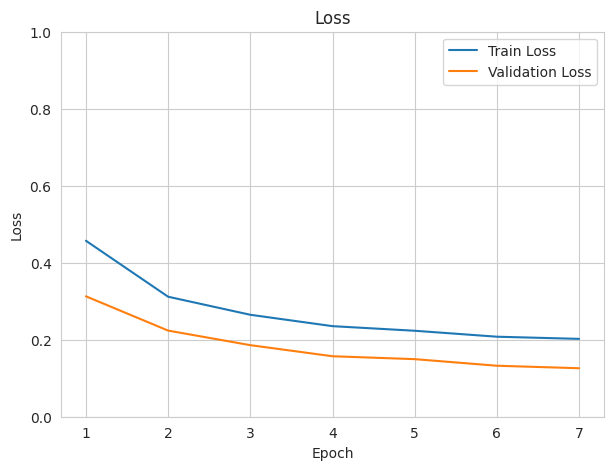

In [66]:
plt.figure(figsize=(7, 5))
plt.plot(range(1, len(bb_fake_articles_classifier.train_losses) + 1), bb_fake_articles_classifier.train_losses, label="Train Loss")
plt.plot(range(1, len(bb_fake_articles_classifier.val_losses) + 1), bb_fake_articles_classifier.val_losses, label="Validation Loss")
plt.ylim(0, 1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

- After 7 epochs the model's validation metrics (with 0.5 threshold) are:
  - Loss: 0.1259552538394928
  - Accuracy: 0.9761565923690796
  - F1-score: 0.9779406189918518
  - ROC-AUC: 0.9887111186981201

### 3.2.2. Testing the DL classifier

In [32]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
test_targets, test_predictions = hf.test_model(bb_fake_articles_classifier, test_dataloader_bb, device=device)

In [35]:
val_targets, val_predictions = hf.test_model(bb_fake_articles_classifier, val_dataloader_bb, device=device)

We will find the optimal threshold on validation data and then use it for testing.

Best threshold: 0.60
Precision: 0.9806, Recall: 0.9781,F1-score: 0.9794, ROC-AUC: 0.9956


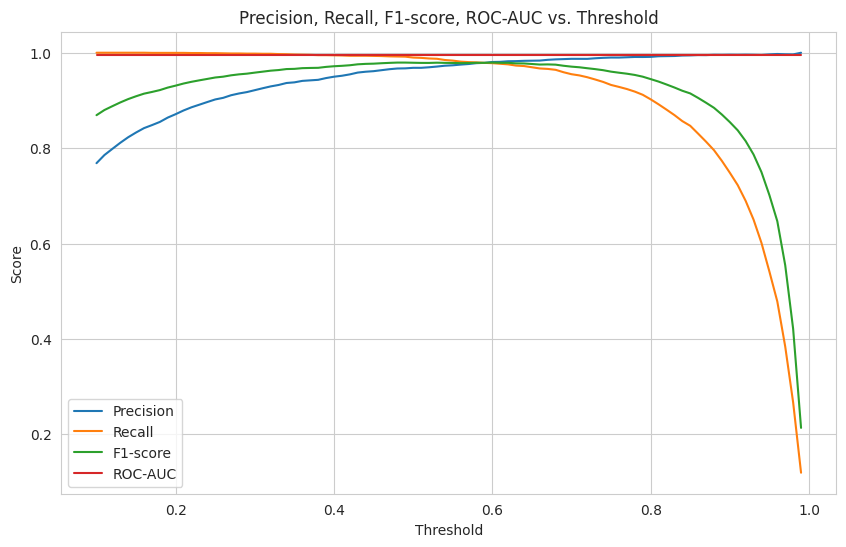

In [39]:
metrics = hf.calculate_metrics(val_targets, val_predictions)

In [60]:
test_thresholded_predictions = (np.array(test_predictions) > 0.6).astype(int)

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      2467
         1.0       0.98      0.98      0.98      3154

    accuracy                           0.98      5621
   macro avg       0.98      0.98      0.98      5621
weighted avg       0.98      0.98      0.98      5621



'ROC-AUC Score: 0.978'

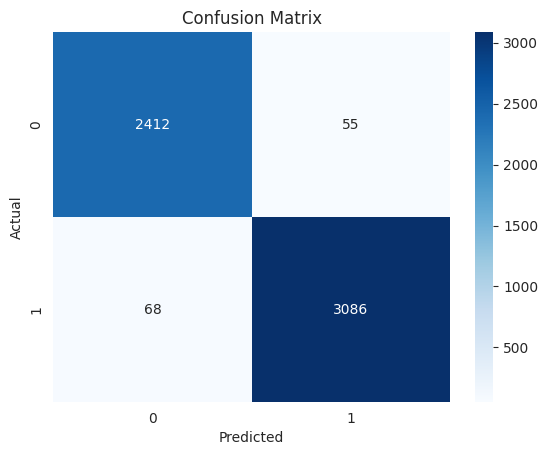

None

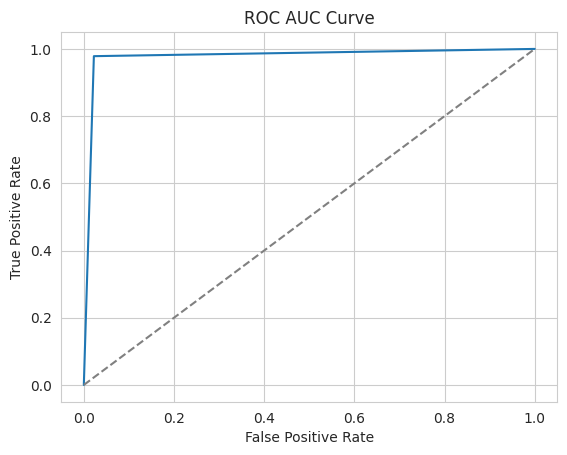

None

In [93]:
print(classification_report(test_targets, test_thresholded_predictions))
roc_auc = roc_auc_score(test_targets, test_thresholded_predictions)
display(f'ROC-AUC Score: {roc_auc:.3f}')
display(hf.plot_confusion_matrix(test_targets, test_thresholded_predictions))
display(hf.plot_roc_auc_curve(test_targets, test_thresholded_predictions))

- Overall, the DL model performs well enough, but it doesn't outperform ML models and requires more computational resources for training.

### 3.2.3. Analyzing the misclassified items

In [92]:
def calculate_bce_loss(targets, predictions):
    epsilon = 1e-7
    targets = np.clip(targets, epsilon, 1 - epsilon)
    predictions = np.clip(predictions, epsilon, 1 - epsilon)
    bce_loss = -(targets * np.log(predictions) + (1 - targets) * np.log(1 - predictions))
    return bce_loss

bce_losses = calculate_bce_loss(test_targets, test_predictions)

top_mispredictions_indices = np.argsort(bce_losses.flatten())[-10:]
label_names = {0: "True", 1: "Fake"}

for idx in top_mispredictions_indices:
    target = test_targets[idx]
    prediction = test_predictions[idx]
    thresholded_prediction = test_thresholded_predictions[idx]
    text = test_dataloader_bb.dataset.texts[idx]

    true_label_name = label_names[int(target)]
    predicted_label_name = label_names[int(thresholded_prediction)]

    print(f"Target: {target} - {true_label_name} article. " +
          f"Prediction: {prediction} - {predicted_label_name} article")
    print("Original Text:", text[:100])
    print("-" * 50)

Target: [0.] - True article. Prediction: [0.9176104] - Fake article
Original Text: trump denies women's claims, says will provide evidence. republican presidential candidate donald tr
--------------------------------------------------
Target: [0.] - True article. Prediction: [0.91776913] - Fake article
Original Text: trump blames baton rouge shooting on 'lack of leadership'. republican donald trump responded to the 
--------------------------------------------------
Target: [0.] - True article. Prediction: [0.919407] - Fake article
Original Text: factbox: trump on twitter (july 19) - republican senators, healthcare bill, mccain. the following st
--------------------------------------------------
Target: [0.] - True article. Prediction: [0.92780006] - Fake article
Original Text: factbox: trump on twitter (sept 20) - graham-cassidy bill, luther strange. the following statements 
--------------------------------------------------
Target: [0.] - True article. Prediction: [0.9345213] - Fake

- We can observe a very similar structure and words in the top-misclassified articles. We may need to improve our data cleaning and preprocessing to overcome this.

# 4. Conclusions and further improvement

### Observations:
- This dataset contains articles published during a limited timeframe. The data is somewhat imbalanced in regards to target labels and date of publishing. We have performed data cleaning and preprocessing to minimize the imbalance and avoid target leakage.
- Among the ML algorithms that we've tried out, the best performing one was XGBoost classifier trained on bigram tokenized texts with CountVectorizer vectorization.
- Among the DL algorithms, the best performing one was with the BigBird pre-trained feature extractor.
- XGBoost outperformed the DL model with BigBird feature extractor in regards to ROC-AUC score (XGBoost: 0.998, DL BigBird model: 0.978) and computational efficiency. Overall, both ML and DL models are able to separate between classes relatively well.

### Further improvements:
- We should update our data cleaning process based on the analysis of the misclassified articles.
- We may benefit from performing a named entity recognition analysis and remove some named entities from the texts(e.g. locations, people names, organization names, etc.) to avoid overfitting and make the model more suitable for articles from another timeframe.
- ML models may perform better with additional engineered features, such as Flesch reading ease score, Dale Chall score, certain named entities frequencies, etc.
- DL models may perform better with additional unfreezing of the last base layers for a couple of last epochs.